# Description

### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to get counties for zipcodes
from uszipcode import SearchEngine

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build logistic regression
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [4]:
customers = pd.read_csv("Loan_Modelling.csv")
customers.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

<IPython.core.display.Javascript object>

In [5]:
customers.shape  # To know no.of rows and columns in the dataset
print(f"There are {customers.shape[0]} rows and {customers.shape[1]} columns")

There are 5000 rows and 14 columns


<IPython.core.display.Javascript object>

In [6]:
customers.info()  # To check datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

There are no null values in the dataset

In [7]:
customers.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
cols = customers.columns

<IPython.core.display.Javascript object>

In [9]:
cols

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<IPython.core.display.Javascript object>

We have to convert some variables with int64 datatype to category type

In [10]:
cust_new = customers.copy()  # Copying dataset to another variable

<IPython.core.display.Javascript object>

In [11]:
cust_new.describe().T  # Statistical summary of data

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<IPython.core.display.Javascript object>

Observations

    - Customers age ranges from 23 to 67, 75% of customers are of age less than 55
    - Experience has negative values which we need to handle during data preprocessing
    - Standard Deviation for Income and Mortgage is very high and can see huge no.of outliers for these two variables.

In [12]:
cust_new.duplicated().sum()  # To check duplicate values

0

<IPython.core.display.Javascript object>

In [13]:
cust_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

Mapping zipcodes to different locations using suggestions provided in Project FAQ

In [14]:
zipcode_list = cust_new.ZIPCode.unique()  # To get unique zipcodes from dataset

<IPython.core.display.Javascript object>

In [15]:
zipcode_list

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

<IPython.core.display.Javascript object>

In [16]:
zipcode_engine = SearchEngine()

<IPython.core.display.Javascript object>

In [17]:
zip_dict = {}
for zipcd in zipcode_list:
    zipcode = zipcode_engine.by_zipcode(zipcd.astype("str"))
    if zipcode is None:
        #  If there is no zipcode available, we are assigning None as county to that zipcode
        zip_dict.update({zipcd: "None"})
    else:
        zip_dict.update({zipcode.zipcode: zipcode.county})

<IPython.core.display.Javascript object>

In [18]:
for k, v in zip_dict.items():
    if v == "None":
        print(k)

92717
93077
92634
96651


<IPython.core.display.Javascript object>

In [19]:
zip_dict  # Dictionary with zipcodes and counties

{'91107': 'Los Angeles County',
 '90089': 'Los Angeles County',
 '94720': 'Alameda County',
 '94112': 'San Francisco County',
 '91330': 'Los Angeles County',
 '92121': 'San Diego County',
 '91711': 'Los Angeles County',
 '93943': 'Monterey County',
 '93023': 'Ventura County',
 '94710': 'Alameda County',
 '90277': 'Los Angeles County',
 '93106': 'Santa Barbara County',
 '94920': 'Marin County',
 '91741': 'Los Angeles County',
 '95054': 'Santa Clara County',
 '95010': 'Santa Cruz County',
 '94305': 'Santa Clara County',
 '91604': 'Los Angeles County',
 '94015': 'San Mateo County',
 '90095': 'Los Angeles County',
 '91320': 'Ventura County',
 '95521': 'Humboldt County',
 '95064': 'Santa Cruz County',
 '90064': 'Los Angeles County',
 '94539': 'Alameda County',
 '94104': 'San Francisco County',
 '94117': 'San Francisco County',
 '94801': 'Contra Costa County',
 '94035': 'Santa Clara County',
 '92647': 'Orange County',
 '95814': 'Sacramento County',
 '94114': 'San Francisco County',
 '94115':

<IPython.core.display.Javascript object>

In [20]:
cust_temp = cust_new.copy()

<IPython.core.display.Javascript object>

In [21]:
cust_temp["Location"] = cust_temp.loc[:, "ZIPCode"]

<IPython.core.display.Javascript object>

In [22]:
# Changing datatype of location variable to string
cust_temp["Location"] = cust_temp["Location"].astype("str")

<IPython.core.display.Javascript object>

In [23]:
cust_temp

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard Location  
0              0    91107  
1              0    90089  
2              0    94720  
3              0    94112  
4              1    91330  
...          ...      ...  
4995           0    92697  
4996           0    92037  
4997           0    93023  
4998           0    90034  
4999           1    92612  

[5000 rows x 15 columns]

<IPython.core.display.Javascript object>

In [24]:
cust_temp = cust_temp.replace({"Location": zip_dict})

<IPython.core.display.Javascript object>

In [25]:
cust_temp

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard              Location  
0              0    Los Angeles County  
1              0    Los Angeles County  
2              0        Alameda County  
3              0  San Francisco County  
4              1    Los Angeles County  
...          ...                   ...  
4995           0         Orange County  
4996           0      San Diego County  
4997           0        Ventura County  
4998           0    Los Angeles County  
4999           1         Orange County  

[5000 rows x 15 columns]

<IPython.core.display.Javascript object>

In [26]:
cust_temp.Location.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

<IPython.core.display.Javascript object>

Observations

Los Angeles county has more no.of customers (1095)

In [27]:
len(cust_temp.Location.value_counts())

42

<IPython.core.display.Javascript object>

In [28]:
cust_temp.ZIPCode.nunique()

467

<IPython.core.display.Javascript object>

In [29]:
cust_temp.Location.nunique()

42

<IPython.core.display.Javascript object>

In [30]:
# Gathered california regions from below url
# https://coolcalifornia.arb.ca.gov/regions

cal_regions = {
    "Los Angeles County": "South Coast Region",
    "San Diego County": "South Coast Region",
    "Santa Clara County": "Bay Area",
    "Alameda County": "Bay Area",
    "Orange County": "South Coast Region",
    "San Francisco County": "Bay Area",
    "San Mateo County": "Bay Area",
    "Sacramento County": "North Central Region",
    "Santa Barbara County": "South Coast Region",
    "Yolo County": "North Central Region",
    "Monterey County": "Central Region",
    "Ventura County": "South Coast Region",
    "San Bernardino County": "Inland Deserts Region",
    "Contra Costa County": "Bay Area",
    "Santa Cruz County": "Bay Area",
    "Riverside County": "Inland Deserts Region",
    "Marin County": "Bay Area",
    "Kern County": "Central Region",
    "San Luis Obispo County": "Central Region",
    "Solano County": "Bay Area",
    "Humboldt County": "Northern Region",
    "Sonoma County": "Bay Area",
    "Fresno County": "Central Region",
    "Placer County": "North Central Region",
    "92717": "Unknown",
    "Butte County": "North Central Region",
    "Shasta County": "Northern Region",
    "El Dorado County": "North Central Region",
    "Stanislaus County": "Central Region",
    "San Benito County": "Central Region",
    "San Joaquin County": "North Central Region",
    "Mendocino County": "Northern Region",
    "Siskiyou County": "Northern Region",
    "Tuolumne County": "Central Region",
    "96651": "Unknown",
    "92634": "Unknown",
    "Lake County": "North Central Region",
    "Trinity County": "Northern Region",
    "Merced County": "Central Region",
    "Napa County": "Bay Area",
    "Imperial County": "Inland Deserts Region",
    "93077": "Unknown",
}

<IPython.core.display.Javascript object>

In [31]:
cust_temp["Region"] = cust_temp.loc[:, "Location"]

<IPython.core.display.Javascript object>

In [32]:
cust_temp["Region"] = cust_temp["Region"].astype("str")

<IPython.core.display.Javascript object>

In [33]:
# We are reducing dimensionality by mapping zipcodes to counties and further reduced the dimensionality by mapping counties to regions
cust_temp = cust_temp.replace(
    {"Region": cal_regions}
)  # Replacing Region variable with Regions

<IPython.core.display.Javascript object>

In [34]:
cust_temp.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

               Location              Region  
0    Los Angeles County  South Coast Region  
1    Los Angeles County  South Coast Region  
2        Alameda County            Bay Area  
3  San Francisco County            Bay Area  
4    Los Angeles County  South Coast Region  
5      San Diego County  South Coast Region  
6    Los Angeles County  South Coast Region  
7       Monterey County      Central Region  
8    Los Angeles County  South Coast Region  
9        Ventura County  South Coast Region

<IPython.core.display.Javascript object>

In [35]:
cust_temp["Region"].value_counts()

South Coast Region       2270
Bay Area                 1795
North Central Region      391
Central Region            281
Inland Deserts Region     160
Northern Region            69
Unknown                    34
Name: Region, dtype: int64

<IPython.core.display.Javascript object>

South Coast Region and Bay Area has more no.of customers with 2270 and 1795 customer count respectively

In [36]:
cust_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  Location            5000 non-null   object 
 15  Region              5000 non-null   object 
dtypes: flo

<IPython.core.display.Javascript object>

In [37]:
cust_temp.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Location              0
Region                0
dtype: int64

<IPython.core.display.Javascript object>

In [38]:
def feature_value_counts(cat_cols):
    for i in cat_cols:
        print("Unique values in", i, "are :")
        print(cust_temp[i].value_counts())
        print("*" * 50)

<IPython.core.display.Javascript object>

In [39]:
cat_cols = [
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "Region",
]

cust_temp[cat_cols] = cust_temp[cat_cols].astype("category")

<IPython.core.display.Javascript object>

In [40]:
cust_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Location            5000 non-null   object  
 15  Region              5000 non-null   ca

<IPython.core.display.Javascript object>

In [41]:
feature_value_counts(cat_cols)

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************
Unique values in Region are :
South Coast Region       2270
Bay Area                 1795
North Central Region      391
Central Region            281
Inland Deserts Region     160
Northern Region            69
Unknown                    34
Name: Region, dtype: int64
*************************************

<IPython.core.display.Javascript object>

#### Data Preprocessing

Treating missing values and negative values

There are no missing values but we see negative values for Education column

In [42]:
cust_data1 = cust_temp.copy()

<IPython.core.display.Javascript object>

In [43]:
cust_data1[cust_data1["Experience"] < 0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg Education  \
89      90   25          -1     113    94303       4   2.30         3   
226    227   24          -1      39    94085       2   1.70         2   
315    316   24          -2      51    90630       3   0.30         3   
451    452   28          -2      48    94132       2   1.75         3   
524    525   24          -1      75    93014       4   0.20         1   
536    537   25          -1      43    92173       3   2.40         2   
540    541   25          -1     109    94010       4   2.30         3   
576    577   25          -1      48    92870       3   0.30         3   
583    584   24          -1      38    95045       2   1.70         2   
597    598   24          -2     125    92835       2   7.20         1   
649    650   25          -1      82    92677       4   2.10         3   
670    671   23          -1      61    92374       4   2.60         1   
686    687   24          -1      38    92612       4   0.60         2   
793    794   24          -2     150    94720       2   2.00         1   
889    890   24          -2      82    91103       2   1.60         3   
909    910   23          -1     149    91709       1   6.33         1   
1173  1174   24          -1      35    94305       2   1.70         2   
1428  1429   25          -1      21    94583       4   0.40         1   
1522  1523   25          -1     101    94720       4   2.30         3   
1905  1906   25          -1     112    92507       2   2.00         1   
2102  2103   25          -1      81    92647       2   1.60         3   
2430  2431   23          -1      73    92120       4   2.60         1   
2466  2467   24          -2      80    94105       2   1.60         3   
2545  2546   25          -1      39    94720       3   2.40         2   
2618  2619   23          -3      55    92704       3   2.40         2   
2717  2718   23          -2      45    95422       4   0.60         2   
2848  2849   24          -1      78    94720       2   1.80         2   
2876  2877   24          -2      80    91107       2   1.60         3   
2962  2963   23          -2      81    91711       2   1.80         2   
2980  2981   25          -1      53    94305       3   2.40         2   
3076  3077   29          -1      62    92672       2   1.75         3   
3130  3131   23          -2      82    92152       2   1.80         2   
3157  3158   23          -1      13    94720       4   1.00         1   
3279  3280   26          -1      44    94901       1   2.00         2   
3284  3285   25          -1     101    95819       4   2.10         3   
3292  3293   25          -1      13    95616       4   0.40         1   
3394  3395   25          -1     113    90089       4   2.10         3   
3425  3426   23          -1      12    91605       4   1.00         1   
3626  3627   24          -3      28    90089       4   1.00         3   
3796  3797   24          -2      50    94920       3   2.40         2   
3824  3825   23          -1      12    95064       4   1.00         1   
3887  3888   24          -2     118    92634       2   7.20         1   
3946  3947   25          -1      40    93117       3   2.40         2   
4015  4016   25          -1     139    93106       2   2.00         1   
4088  4089   29          -1      71    94801       2   1.75         3   
4116  4117   24          -2     135    90065       2   7.20         1   
4285  4286   23          -3     149    93555       2   7.20         1   
4411  4412   23          -2      75    90291       2   1.80         2   
4481  4482   25          -2      35    95045       4   1.00         3   
4514  4515   24          -3      41    91768       4   1.00         3   
4582  4583   25          -1      69    92691       3   0.30         3   
4957  4958   29          -1      50    95842       2   1.75         3   

      Mortgage  Personal_Loan Securities_Account CD_Account Online CreditCard  \
89           0              0                  0         

<IPython.core.display.Javascript object>

In [44]:
len(cust_data1[cust_data1["Experience"] < 0])

52

<IPython.core.display.Javascript object>

Values for Experience column are negative for 52 Customers of age between 20 and 30. Education level for most of these customers is also good and hence we can assume that there might be a mistake while entering the data. We can handle these negative values by changing them to absolute values.

In [45]:
cust_data1.loc[cust_data1["Experience"] < 0, "Experience"] = np.abs(
    cust_data1["Experience"]
)

<IPython.core.display.Javascript object>

In [46]:
len(cust_data1[cust_data1["Experience"] < 0])

0

<IPython.core.display.Javascript object>

In [47]:
cust_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Location            5000 non-null   object  
 15  Region              5000 non-null   ca

<IPython.core.display.Javascript object>

In [48]:
cust_data1.drop(["ID", "ZIPCode", "Location"], axis=1, inplace=True)
cust_data1.reset_index()

index  Age  Experience  Income  Family  CCAvg Education  Mortgage  \
0         0   25           1      49       4    1.6         1         0   
1         1   45          19      34       3    1.5         1         0   
2         2   39          15      11       1    1.0         1         0   
3         3   35           9     100       1    2.7         2         0   
4         4   35           8      45       4    1.0         2         0   
...     ...  ...         ...     ...     ...    ...       ...       ...   
4995   4995   29           3      40       1    1.9         3         0   
4996   4996   30           4      15       4    0.4         1        85   
4997   4997   63          39      24       2    0.3         3         0   
4998   4998   65          40      49       3    0.5         2         0   
4999   4999   28           4      83       3    0.8         1         0   

      Personal_Loan Securities_Account CD_Account Online CreditCard  \
0                 0                  1          0      0          0   
1                 0                  1          0      0          0   
2                 0                  0          0      0          0   
3                 0                  0          0      0          0   
4                 0                  0          0      0          1   
...             ...                ...        ...    ...        ...   
4995              0                  0          0      1          0   
4996              0                  0          0      1          0   
4997              0                  0          0      0          0   
4998              0                  0          0      1          0   
4999              0                  0          0      1          1   

                  Region  
0     South Coast Region  
1     South Coast Region  
2               Bay Area  
3               Bay Area  
4     South Coast Region  
...                  ...  
4995  South Coast Region  
4996  South Coast Region  
4997  South Coast Region  
4998  South Coast Region  
4999  South Coast Region  

[5000 rows x 14 columns]

<IPython.core.display.Javascript object>

In [49]:
cust_data1.describe().T

count       mean         std   min   25%   50%    75%    max
Age            5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience     5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   43.0
Income         5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
Family         5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0    4.0
CCAvg          5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage       5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0
Personal_Loan  5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0    1.0

<IPython.core.display.Javascript object>

In [50]:
cust_data1.head(10)

Age  Experience  Income  Family  CCAvg Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6         1         0              0   
1   45          19      34       3    1.5         1         0              0   
2   39          15      11       1    1.0         1         0              0   
3   35           9     100       1    2.7         2         0              0   
4   35           8      45       4    1.0         2         0              0   
5   37          13      29       4    0.4         2       155              0   
6   53          27      72       2    1.5         2         0              0   
7   50          24      22       1    0.3         3         0              0   
8   35          10      81       3    0.6         2       104              0   
9   34           9     180       1    8.9         3         0              1   

  Securities_Account CD_Account Online CreditCard              Region  
0                  1          0      0          0  South Coast Region  
1                  1          0      0          0  South Coast Region  
2                  0          0      0          0            Bay Area  
3                  0          0      0          0            Bay Area  
4                  0          0      0          1  South Coast Region  
5                  0          0      1          0  South Coast Region  
6                  0          0      1          0  South Coast Region  
7                  0          0      0          1      Central Region  
8                  0          0      1          0  South Coast Region  
9                  0          0      0          0  South Coast Region

<IPython.core.display.Javascript object>

#### Exploratory Data Analysis

In [51]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [52]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

Univariate Analysis

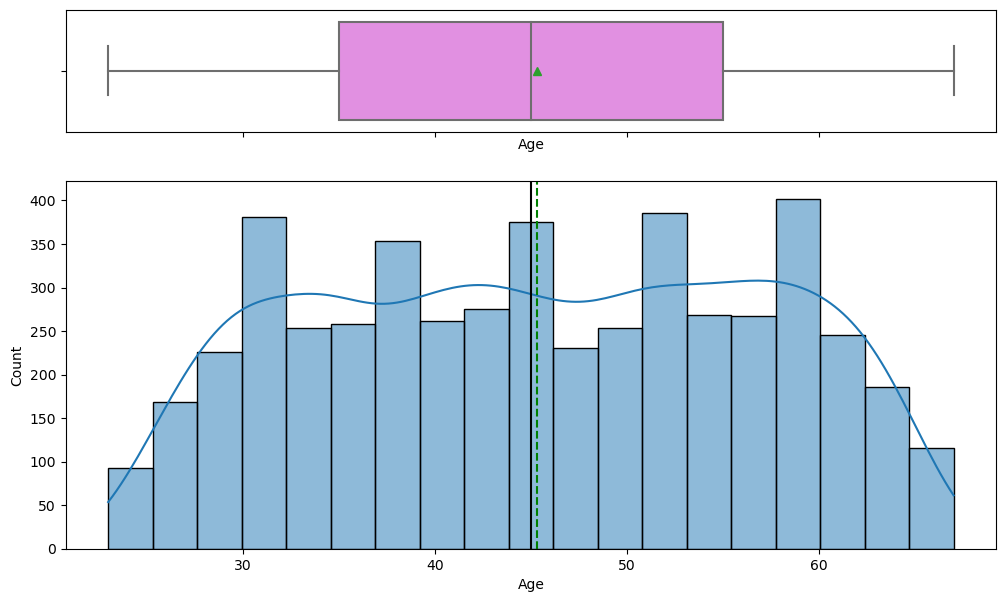

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(cust_data1, "Age", kde=True)

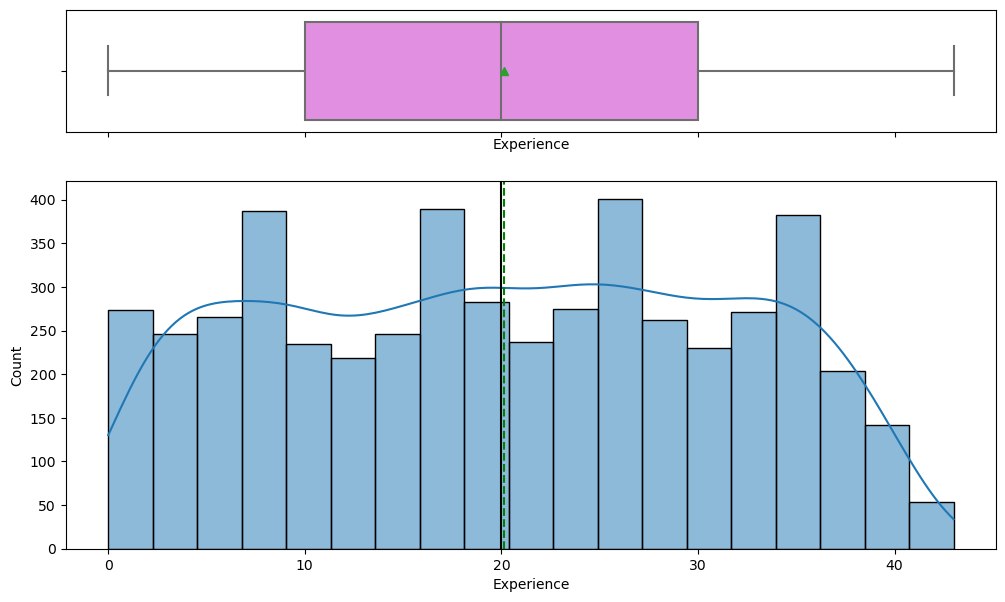

<IPython.core.display.Javascript object>

In [54]:
histogram_boxplot(cust_data1, "Experience", kde=True)

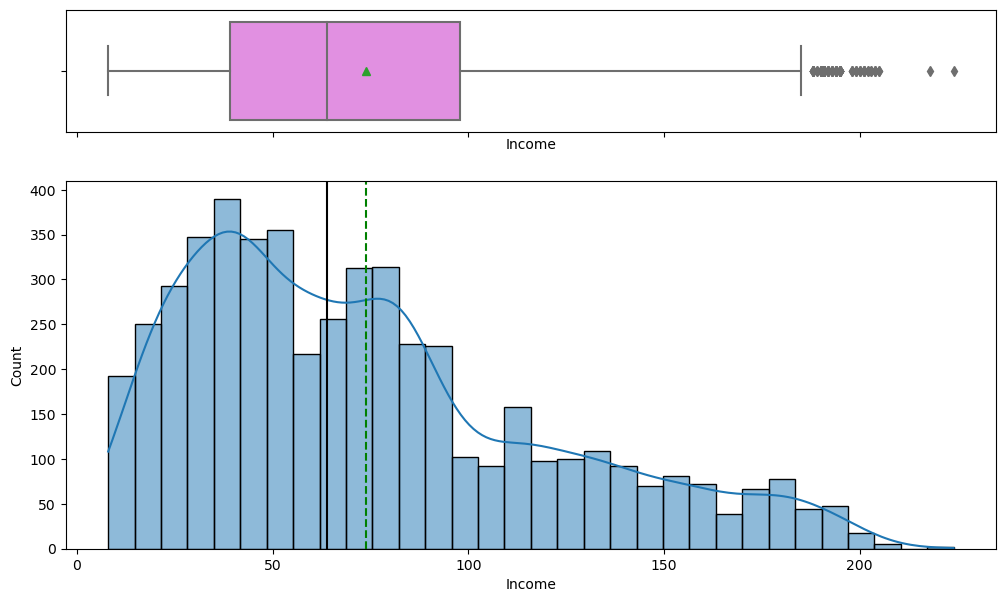

<IPython.core.display.Javascript object>

In [55]:
histogram_boxplot(cust_data1, "Income", kde=True)

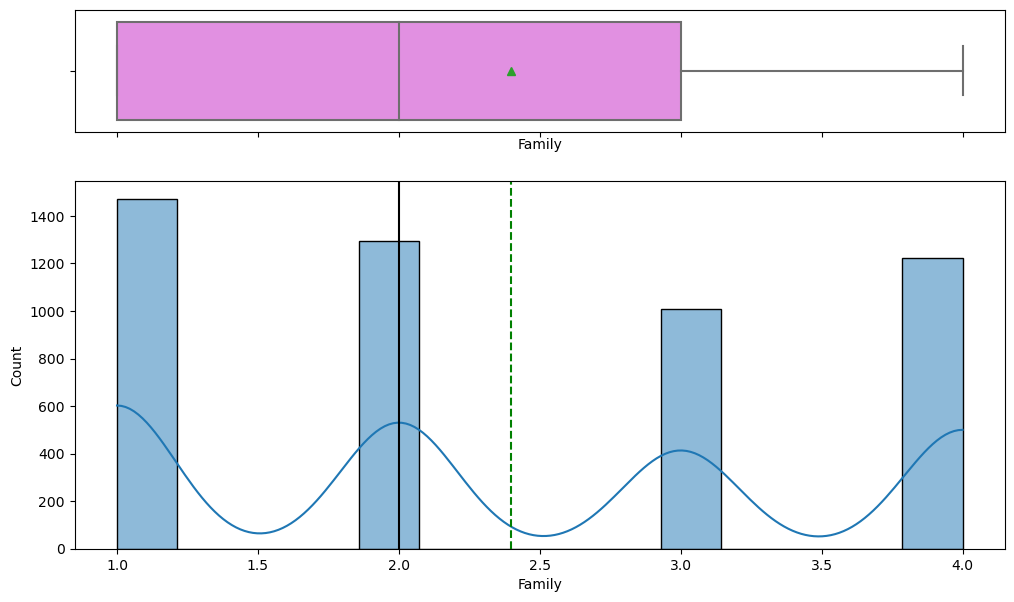

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(cust_data1, "Family", kde=True)

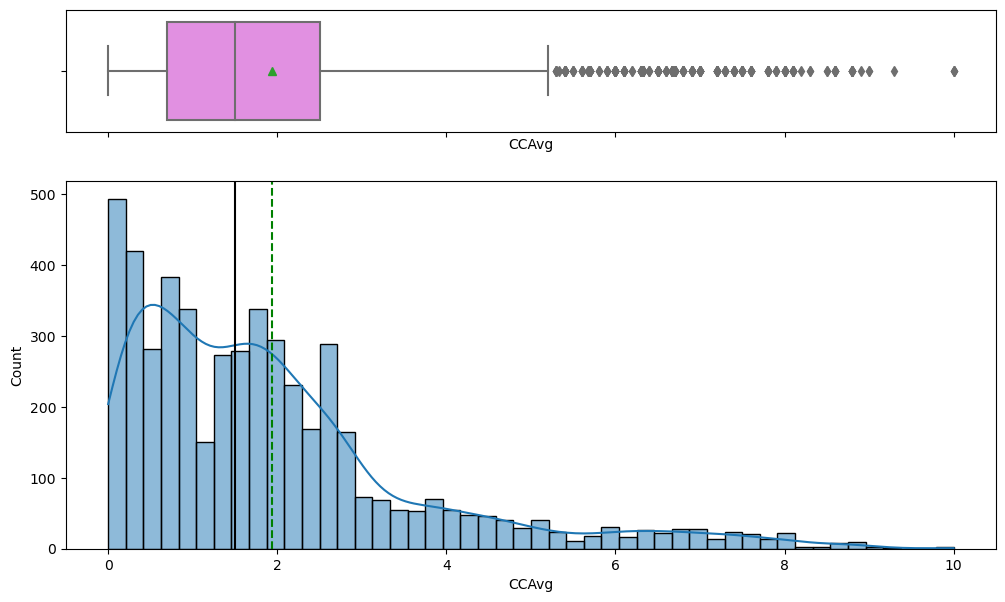

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(cust_data1, "CCAvg", kde=True)

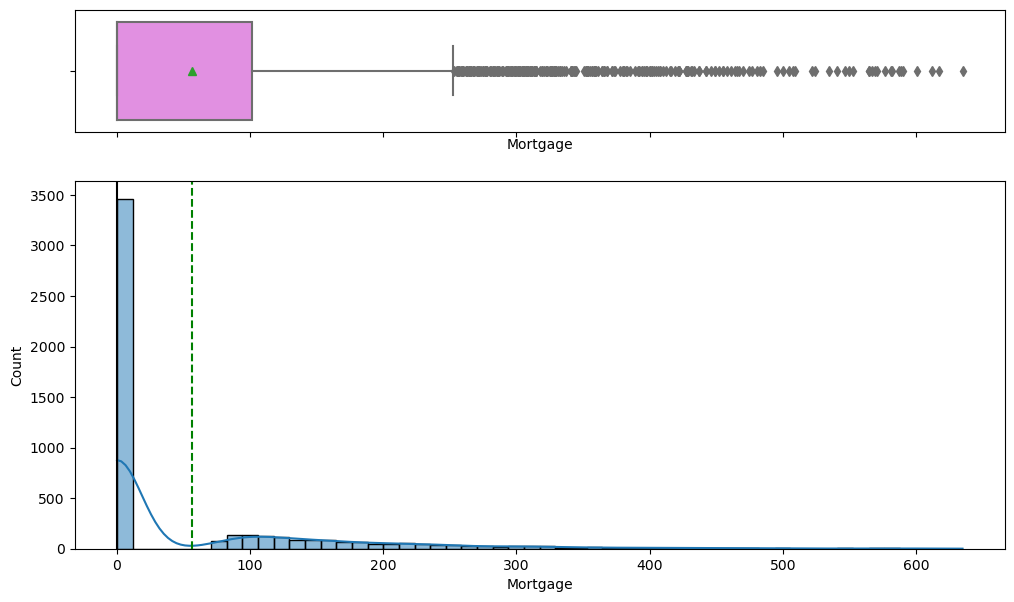

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(cust_data1, "Mortgage", kde=True)

Observations

- Age is normally distributed
- Income, CCAvg and Mortgage are right skewed with outliers

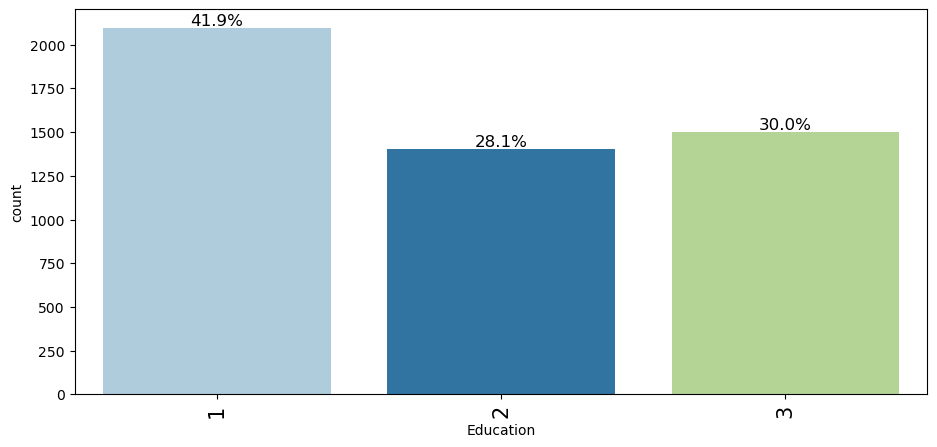

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(cust_data1, "Education", perc=True, n=10)

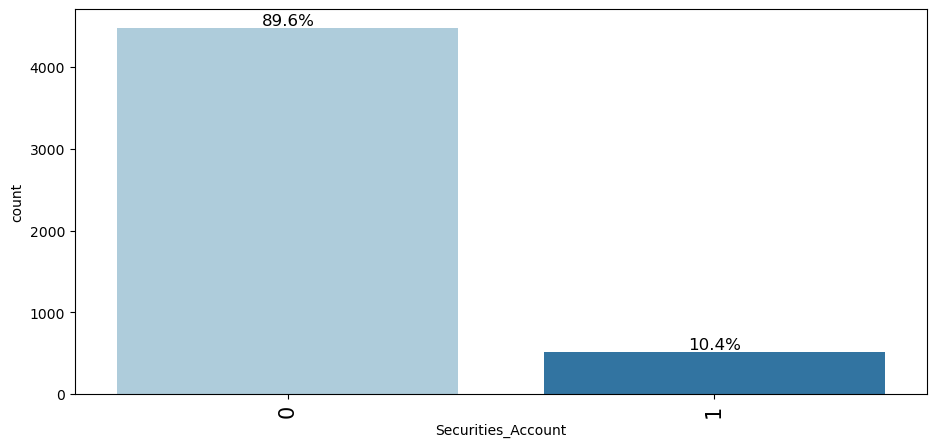

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(cust_data1, "Securities_Account", perc=True, n=10)

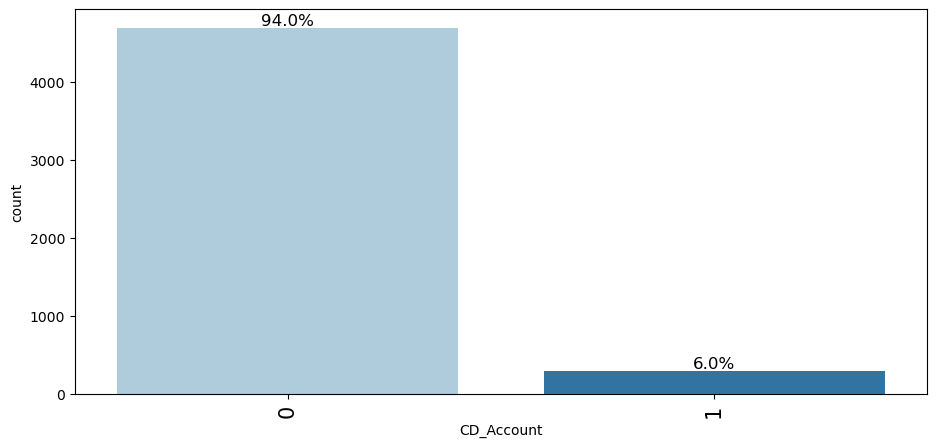

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(cust_data1, "CD_Account", perc=True, n=10)

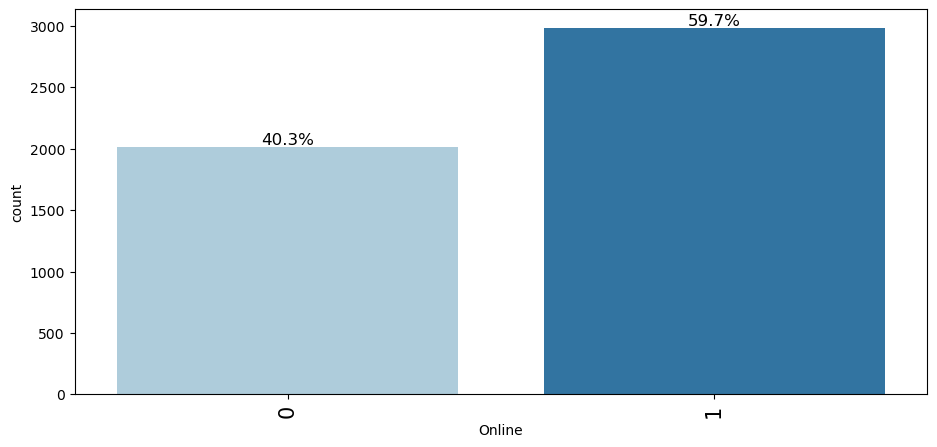

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(cust_data1, "Online", perc=True, n=10)

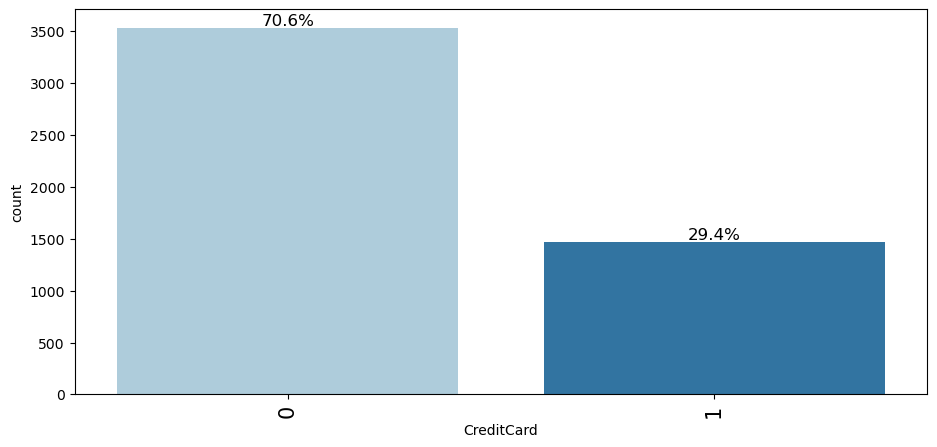

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(cust_data1, "CreditCard", perc=True, n=10)

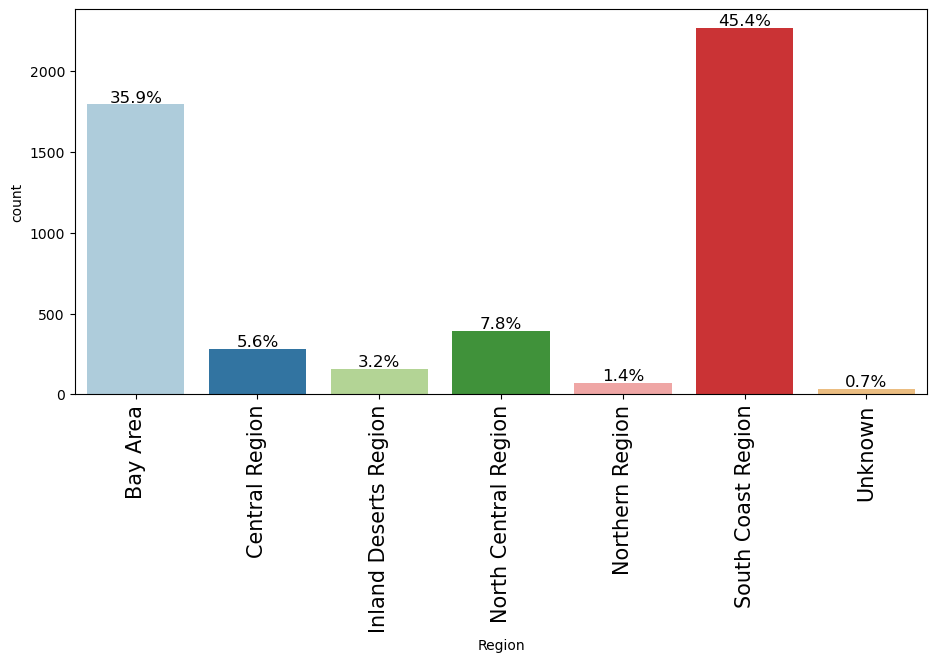

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(cust_data1, "Region", perc=True, n=10)

Observations

- 41.9% of the customers are under grad which is highest among customers with other Education levels
- 89.6% of the customers don't have Securities Account
- 94% of the customers don't have CD_Account
- 59.7% of the customers use internet banking facilities and 40.3% don't use internet banking facilities
- 70.6% of the customers don't use credit card and 29.4% use credit card
- 45.4% of the customers are from South Coast Region which is highest number and 35.9% of the customers are from Bay Area which is next highest

#### Bi-variate Analysis

In [65]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


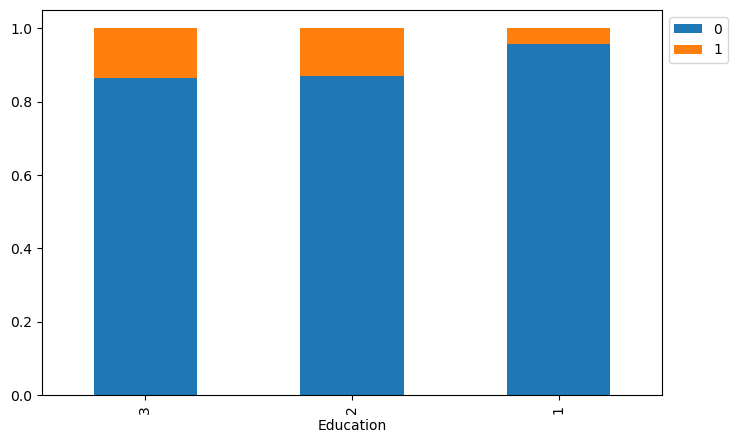

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(cust_data1, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


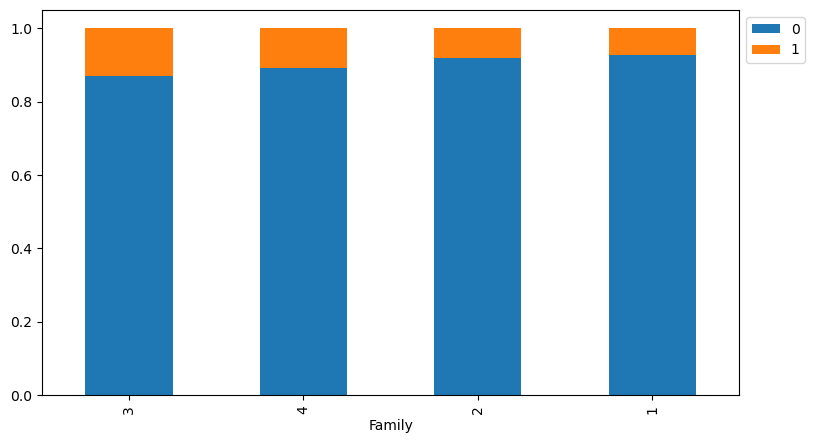

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(cust_data1, "Family", "Personal_Loan")

Personal_Loan             0    1   All
Region                                
All                    4520  480  5000
South Coast Region     2048  222  2270
Bay Area               1614  181  1795
Central Region          251   30   281
North Central Region    362   29   391
Inland Deserts Region   151    9   160
Northern Region          63    6    69
Unknown                  31    3    34
------------------------------------------------------------------------------------------------------------------------


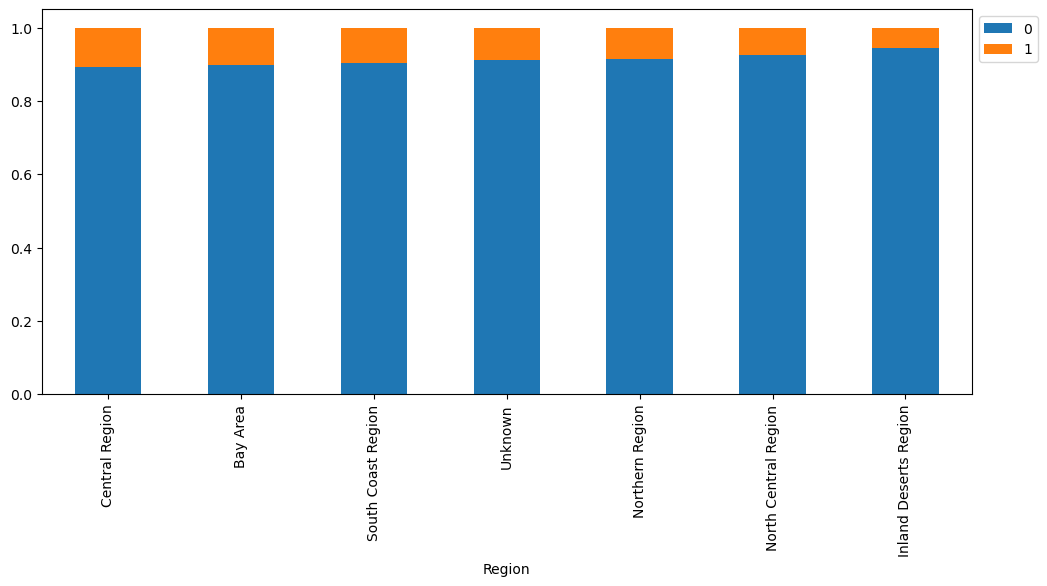

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(cust_data1, "Region", "Personal_Loan")

Observations

- There are more no.of Customers with Education level 2 and 3 who have Personal Loans
- Customers who have personal loans are has family members more than 2 
- Customers who have personal loans are more from Central Region, Bay Area and South Coast Region 

In [69]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

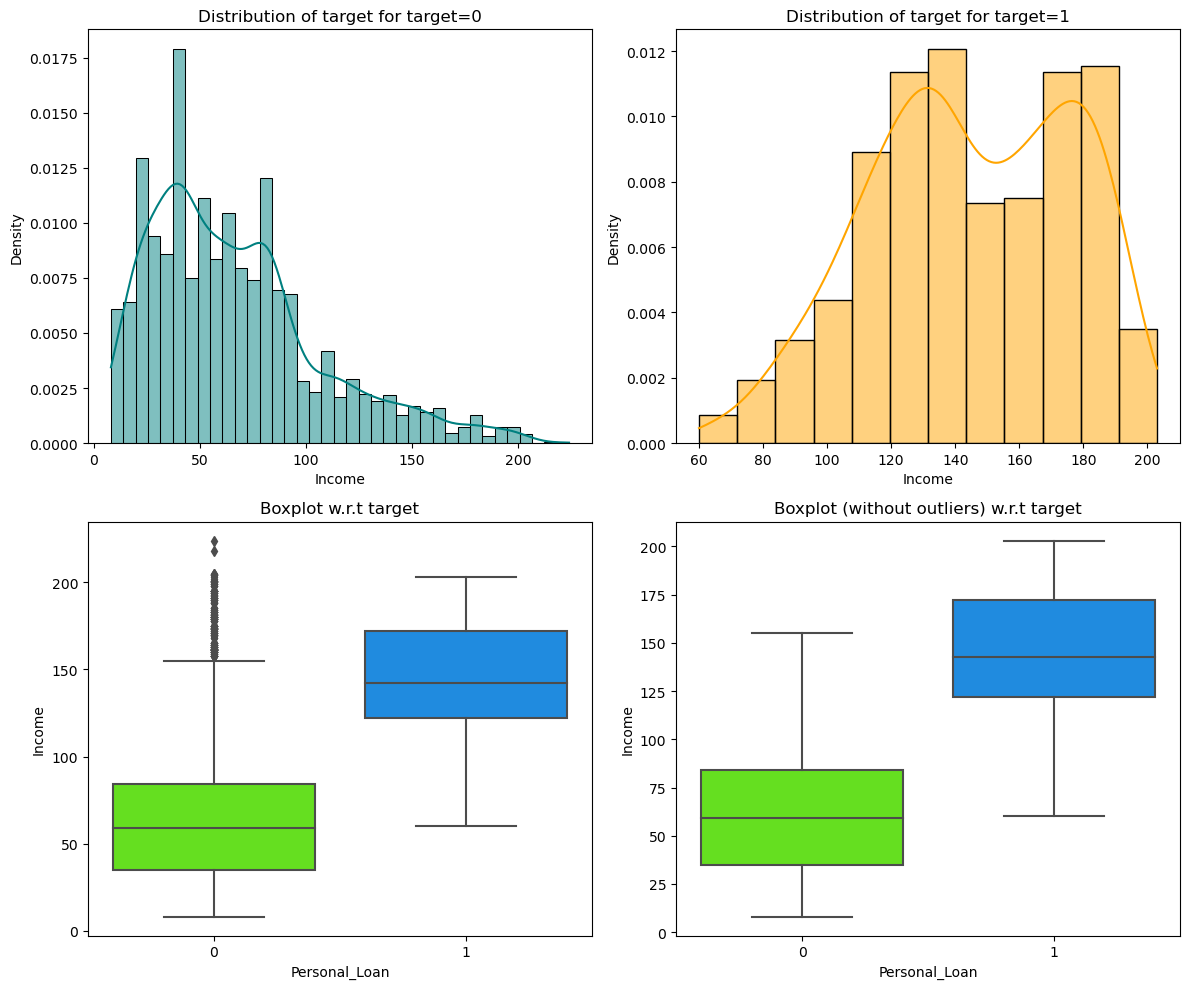

<IPython.core.display.Javascript object>

In [70]:
distribution_plot_wrt_target(cust_data1, "Income", "Personal_Loan")

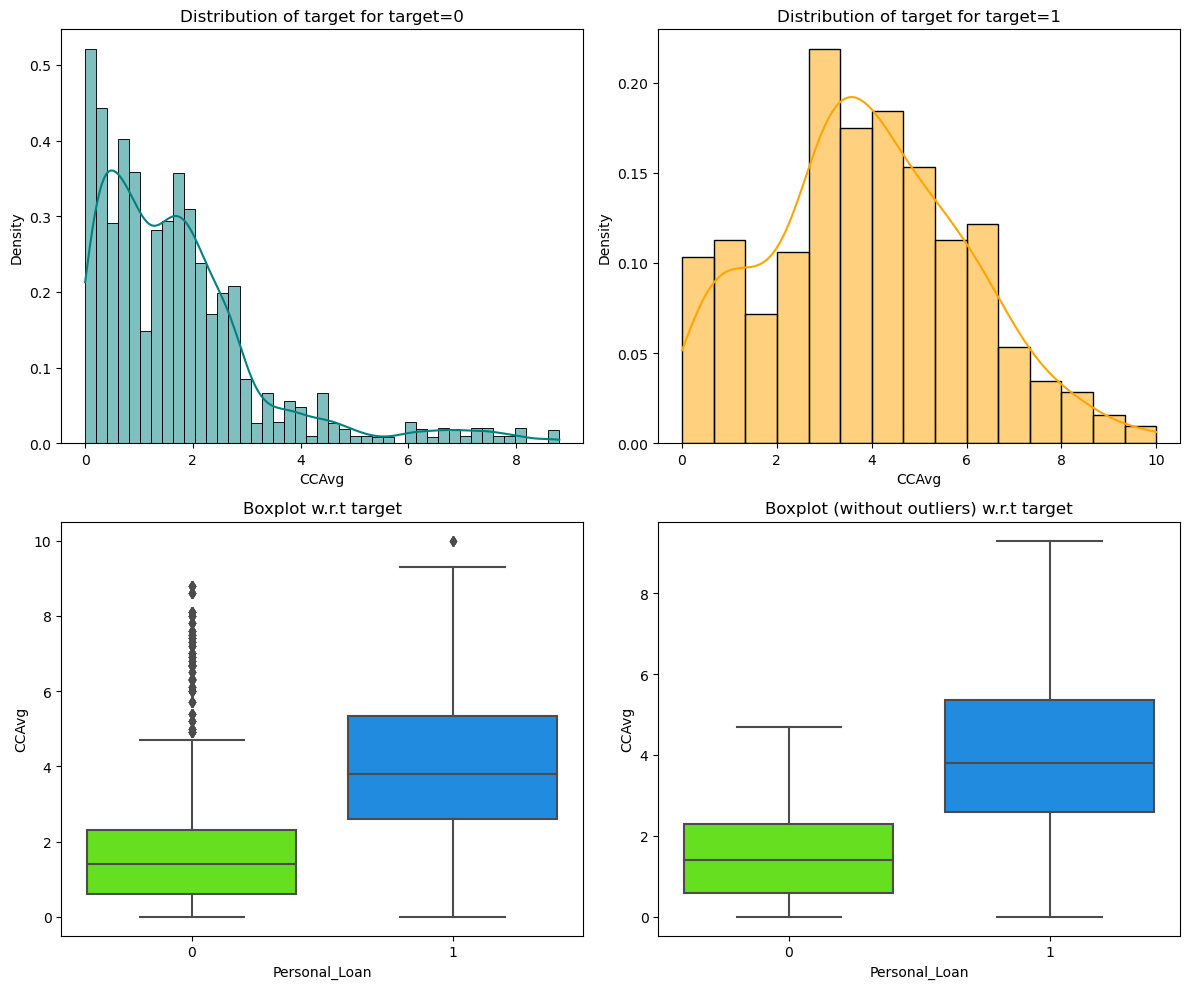

<IPython.core.display.Javascript object>

In [71]:
distribution_plot_wrt_target(cust_data1, "CCAvg", "Personal_Loan")

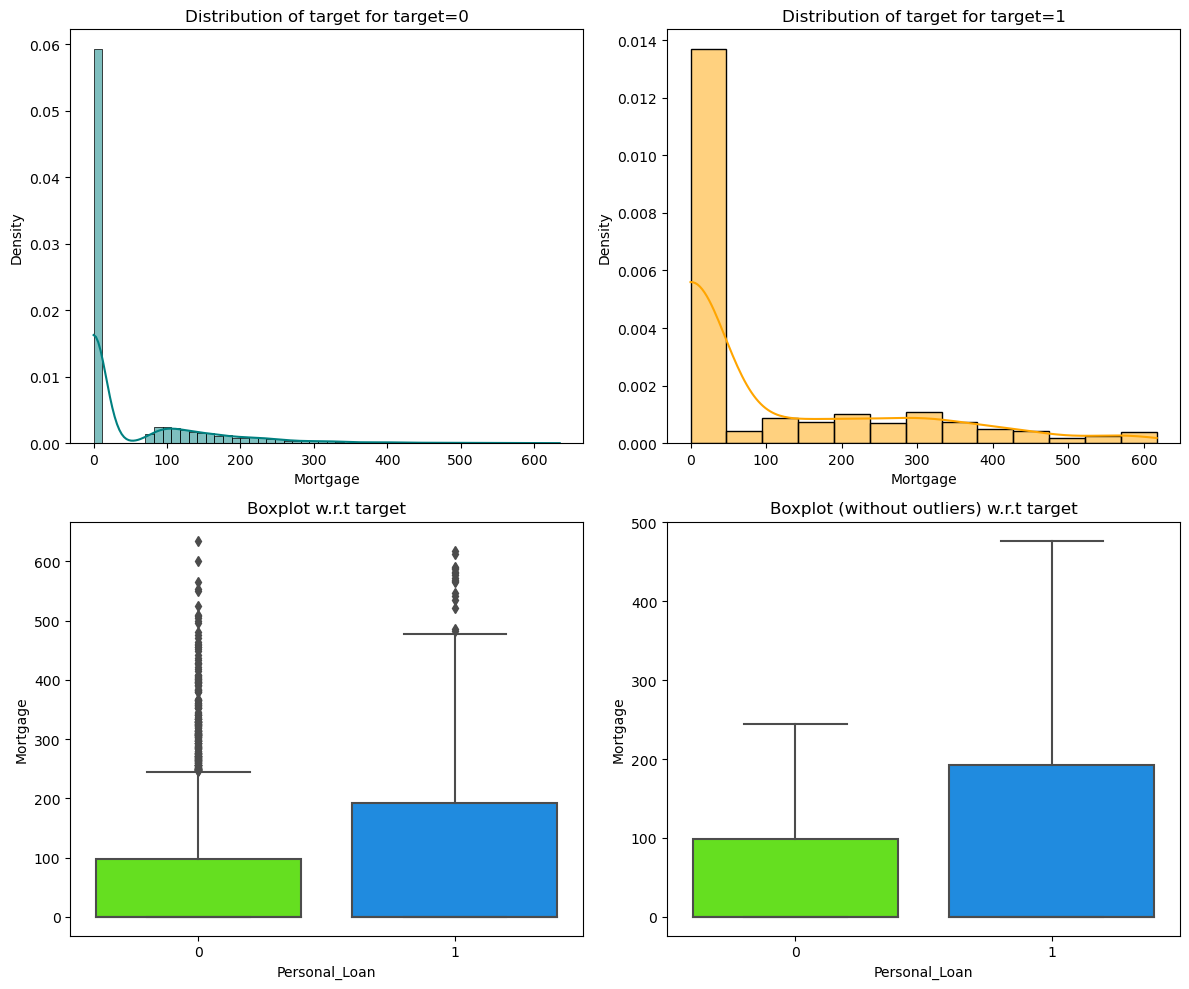

<IPython.core.display.Javascript object>

In [72]:
distribution_plot_wrt_target(cust_data1, "Mortgage", "Personal_Loan")

Observations

- Customers with Income > 90K can be potential customers for accepting personal loan

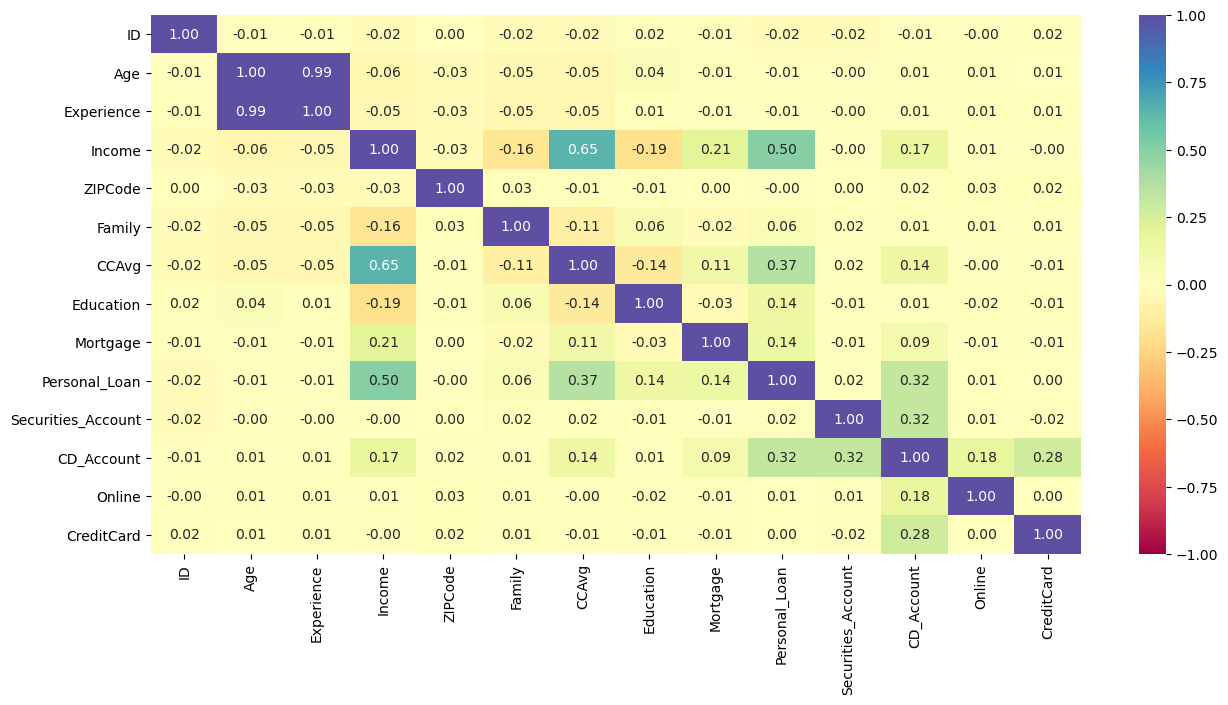

<IPython.core.display.Javascript object>

In [73]:
# multivariate analysis
plt.figure(figsize=(15, 7))
sns.heatmap(cust_new.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations

- Age and Experience are strongly correlated and we can drop either one of the columns while preparing data for model training

- Income and CCAvg has good positive correlation

In [74]:
num_cols = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage"]

<IPython.core.display.Javascript object>

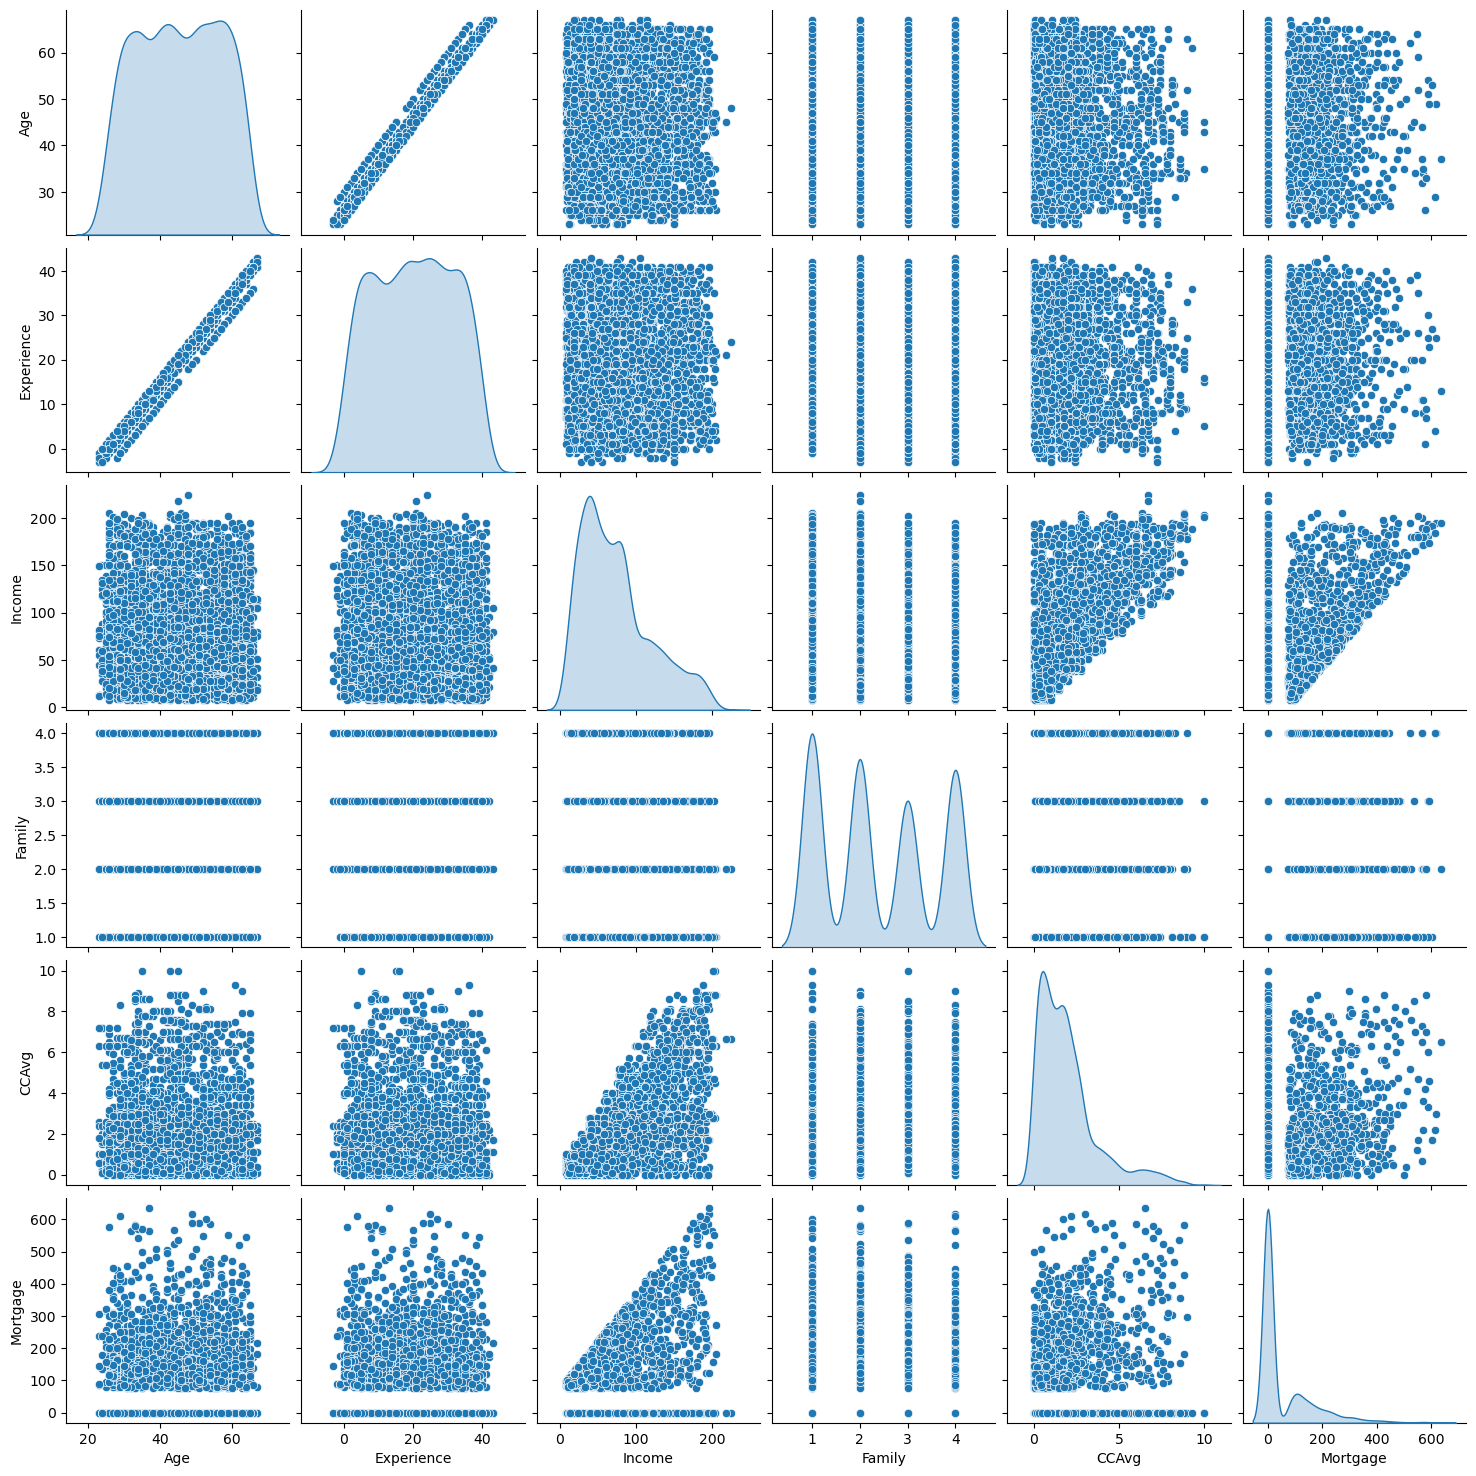

<IPython.core.display.Javascript object>

In [75]:
# pairplot
sns.pairplot(
    data=cust_new[num_cols], diag_kind="kde"
)  # Pairplot helps to understand relationship between numerical columns
plt.show()

### Data Preparation for Model Training

In [76]:
cust_model_data = cust_data1.copy()

<IPython.core.display.Javascript object>

In [77]:
# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

In [78]:
# We are deleting Experience column as it has very strong positive correlation with Age column
X = cust_model_data.drop(["Personal_Loan", "Experience"], axis=1)
y = cust_model_data["Personal_Loan"]

<IPython.core.display.Javascript object>

In [79]:
X = pd.get_dummies(X, columns=["Region", "Education"], drop_first=True)

<IPython.core.display.Javascript object>

In [80]:
# Splitting data in train and test sets
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [81]:
X.head(10)

Age  Income  Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49       4    1.6         0                  1          0      0   
1   45      34       3    1.5         0                  1          0      0   
2   39      11       1    1.0         0                  0          0      0   
3   35     100       1    2.7         0                  0          0      0   
4   35      45       4    1.0         0                  0          0      0   
5   37      29       4    0.4       155                  0          0      1   
6   53      72       2    1.5         0                  0          0      1   
7   50      22       1    0.3         0                  0          0      0   
8   35      81       3    0.6       104                  0          0      1   
9   34     180       1    8.9         0                  0          0      0   

  CreditCard  Region_Central Region  Region_Inland Deserts Region  \
0          0                      0                             0   
1          0                      0                             0   
2          0                      0                             0   
3          0                      0                             0   
4          1                      0                             0   
5          0                      0                             0   
6          0                      0                             0   
7          1                      1                             0   
8          0                      0                             0   
9          0                      0                             0   

   Region_North Central Region  Region_Northern Region  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   
6                            0                       0   
7                            0                       0   
8                            0                       0   
9                            0                       0   

   Region_South Coast Region  Region_Unknown  Education_2  Education_3  
0                          1               0            0            0  
1                          1               0            0            0  
2                          0               0            0            0  
3                          0               0            1            0  
4                          1               0            1            0  
5                          1               0            1            0  
6                          1               0            1            0  
7                          0               0            0            1  
8                          1               0            1            0  
9                          1               0            0            1

<IPython.core.display.Javascript object>

#### Objective

Our objective is to predict whether a liability customer will buy a personal loan or not

There are two Probabilities for prediction where -

1. model predicts that a customer will take personal loan but actual truth is the customer will not take personal loan
2. model predicts that a customer will not take personal loan but actual truth is the customer will take personal loan

Second case is more important for us as the bank can't afford false negative case

We need to focus on Recall in this problem

#### Linear Regression

In [82]:
log_reg_model = LogisticRegression(solver="newton-cg", random_state=1)

<IPython.core.display.Javascript object>

In [83]:
model1 = log_reg_model.fit(X_Train, y_train)

<IPython.core.display.Javascript object>

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [85]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

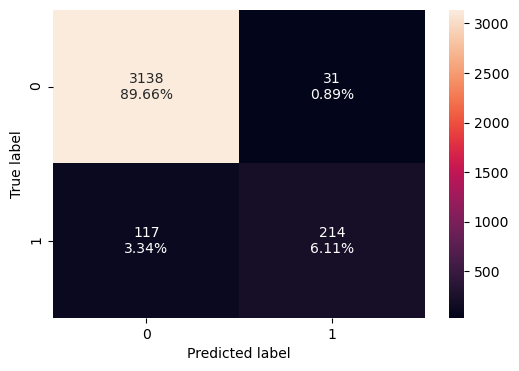

<IPython.core.display.Javascript object>

In [86]:
# Confustion Matrix
confusion_matrix_sklearn_with_threshold(log_reg_model, X_Train, y_train)

In [87]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_Train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.957714  0.646526   0.873469  0.743056

<IPython.core.display.Javascript object>

#### Checking Performance on Test Set

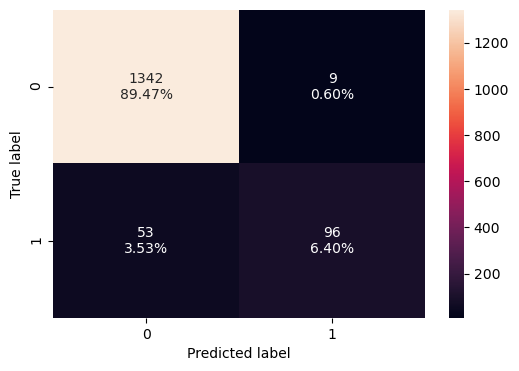

<IPython.core.display.Javascript object>

In [88]:
confusion_matrix_sklearn_with_threshold(log_reg_model, X_Test, y_test)

In [89]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_model, X_Test, y_test
)

print("Testing performance:")
log_reg_model_test_perf

Testing performance:


Accuracy    Recall  Precision        F1
0  0.958667  0.644295   0.914286  0.755906

<IPython.core.display.Javascript object>

Observation

Recall on test set is 64% which is not a good number and we need to improve this 

ROC-AUC on training set

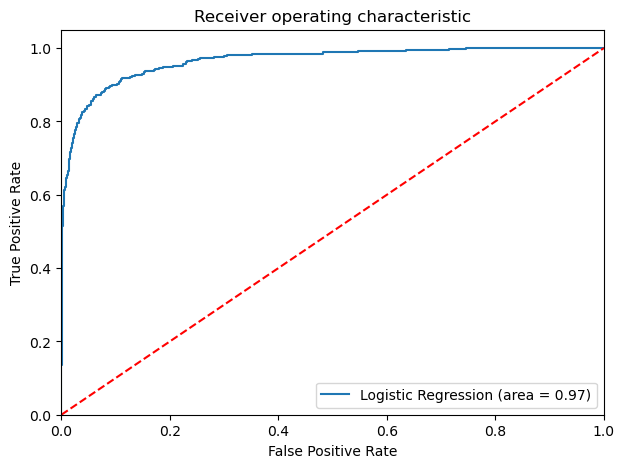

<IPython.core.display.Javascript object>

In [90]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, log_reg_model.predict_proba(X_Train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, log_reg_model.predict_proba(X_Train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

ROC-AUC on test set

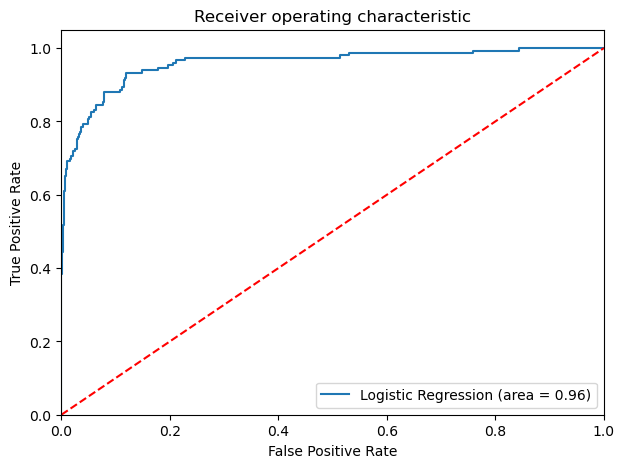

<IPython.core.display.Javascript object>

In [91]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, log_reg_model.predict_proba(X_Test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_Test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

. Model is giving generalized performance.

. ROC-AUC on training set is 0.97 and test set is 0.96

#### Model Performance Improvement

Let's try to change the model threshold using ROC-AUC curve and see if we can improve Recall

In [92]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, log_reg_model.predict_proba(X_Train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)


0.15922277513492175


<IPython.core.display.Javascript object>

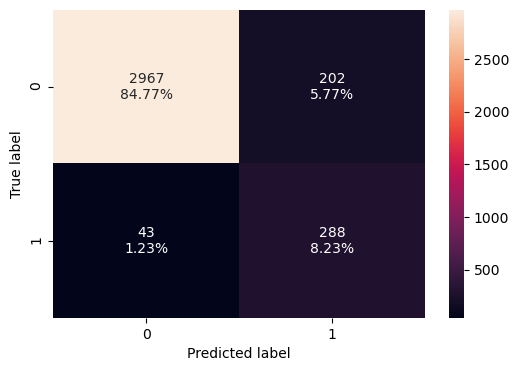

<IPython.core.display.Javascript object>

In [93]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_Train, y_train, threshold=optimal_threshold_auc_roc
)

In [94]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        log_reg_model, X_Train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0      0.93  0.870091   0.587755  0.701583

<IPython.core.display.Javascript object>

- Recall is 0.87 on train set which has significantly increased

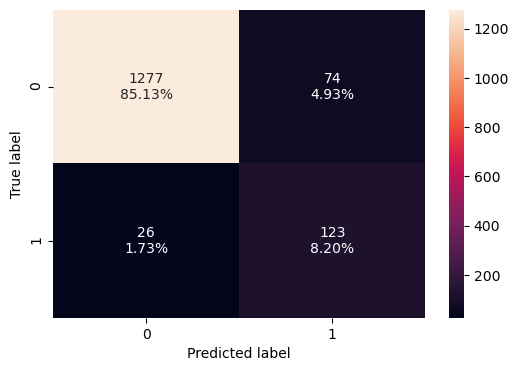

<IPython.core.display.Javascript object>

In [95]:
# Checking model performance on test set
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_Test, y_test, threshold=optimal_threshold_auc_roc
)

In [96]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        log_reg_model, X_Test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.933333  0.825503   0.624365  0.710983

<IPython.core.display.Javascript object>

- Recall has increased to 0.825 on test set

Precision-Recall Curve

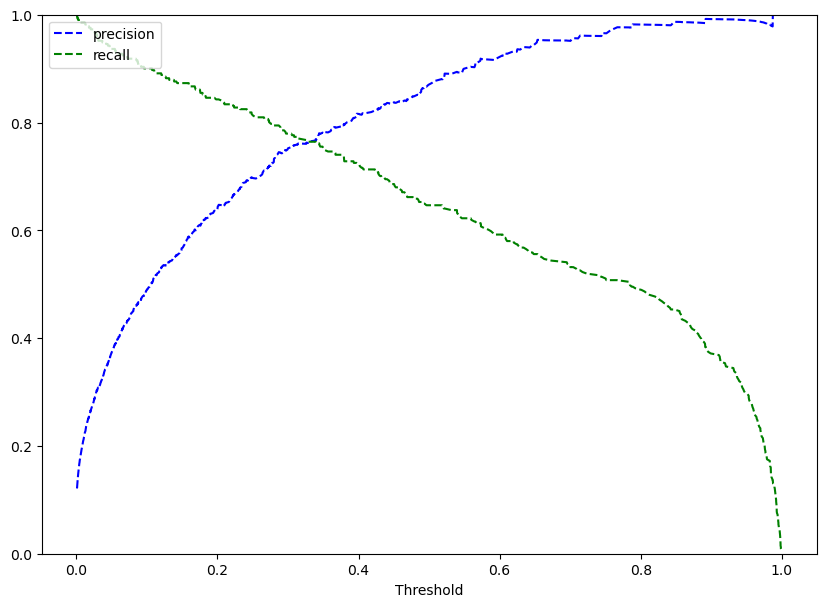

<IPython.core.display.Javascript object>

In [97]:
# Find the predicted probabilities for class 1
y_scores = log_reg_model.predict_proba(X_Train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At 0.32 we get balanced recall and precision

In [98]:
# setting the threshold
optimal_threshold_curve = 0.3

<IPython.core.display.Javascript object>

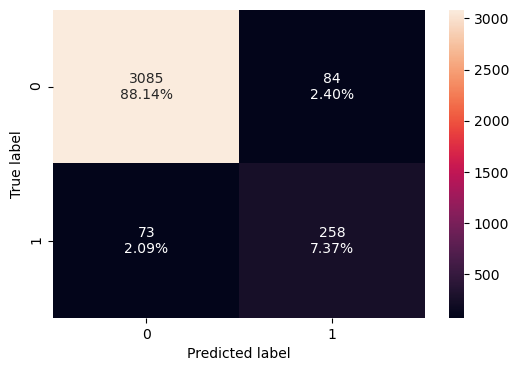

<IPython.core.display.Javascript object>

In [99]:
# Check model performance on training set

# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_Train, y_train, threshold=optimal_threshold_curve
)

In [100]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        log_reg_model, X_Train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.955143  0.779456   0.754386  0.766716

<IPython.core.display.Javascript object>

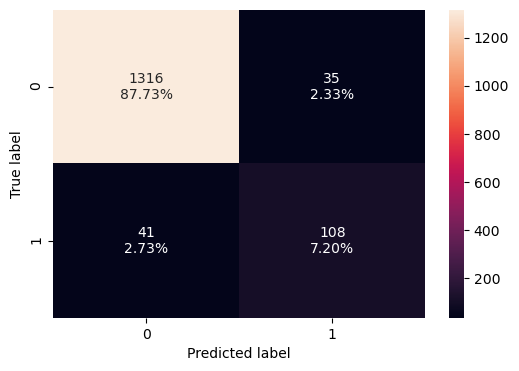

<IPython.core.display.Javascript object>

In [101]:
# Check model performance on Test set

# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    log_reg_model, X_Test, y_test, threshold=optimal_threshold_curve
)

In [102]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        log_reg_model, X_Test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0  0.949333  0.724832   0.755245  0.739726

<IPython.core.display.Javascript object>

#### Model performance summary

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
]
print("Train set performance comparison:")
models_train_comp_df

Train set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.957714                            0.930000   
Recall                        0.646526                            0.870091   
Precision                     0.873469                            0.587755   
F1                            0.743056                            0.701583   

           Logistic Regression-0.32 Threshold  
Accuracy                             0.955143  
Recall                               0.779456  
Precision                            0.754386  
F1                                   0.766716

<IPython.core.display.Javascript object>

In [104]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.30 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.958667                            0.933333   
Recall                        0.644295                            0.825503   
Precision                     0.914286                            0.624365   
F1                            0.755906                            0.710983   

           Logistic Regression-0.30 Threshold  
Accuracy                             0.949333  
Recall                               0.724832  
Precision                            0.755245  
F1                                   0.739726

<IPython.core.display.Javascript object>

### Observation

- We are able to build a model that can be used by the bank to find the potential customers who can take a personal loan with recall of 0.87 on the training set and formulate marketing policies accordingly.

*  Model with default threshold has a recall of 0.64 which is very low and precision of 0.91 which is very high. In order to predict potential customers who can take personal loan, we need to increase recall

*  Model with threshold 0.11 has a recall of 0.82 which has significan increase on Recall but there is no improvement in precision which is 0.62. 

* Model with threshold 0.30 has a recall of 0.72 and precision is 0.75 which shows balanced recall and precision.


### Decision Tree

In [105]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)

<IPython.core.display.Javascript object>

In [106]:
model.fit(X_Train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

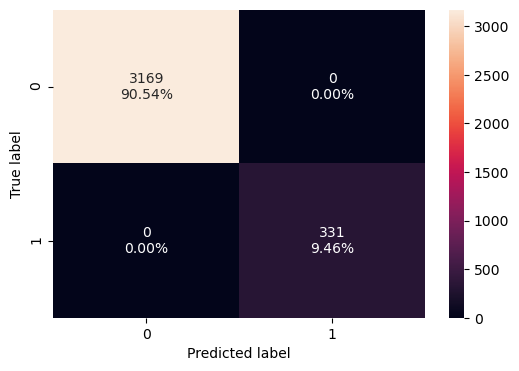

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn_with_threshold(model, X_Train, y_train)

In [108]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [109]:
decision_tree_perf_train = get_recall_score(model, X_Train, y_train)
decision_tree_perf_train

1.0

<IPython.core.display.Javascript object>

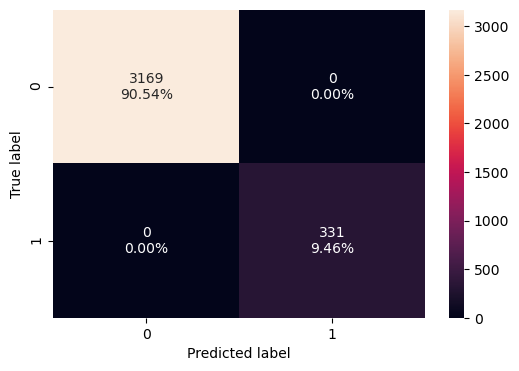

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn_with_threshold(model, X_Train, y_train)

In [111]:
decision_tree_perf_test = get_recall_score(model, X_Test, y_test)

decision_tree_perf_test

0.8993288590604027

<IPython.core.display.Javascript object>

### Visualizing Decision Tree

In [112]:
## creating a list of column names
feature_names = X_Train.columns.to_list()

<IPython.core.display.Javascript object>

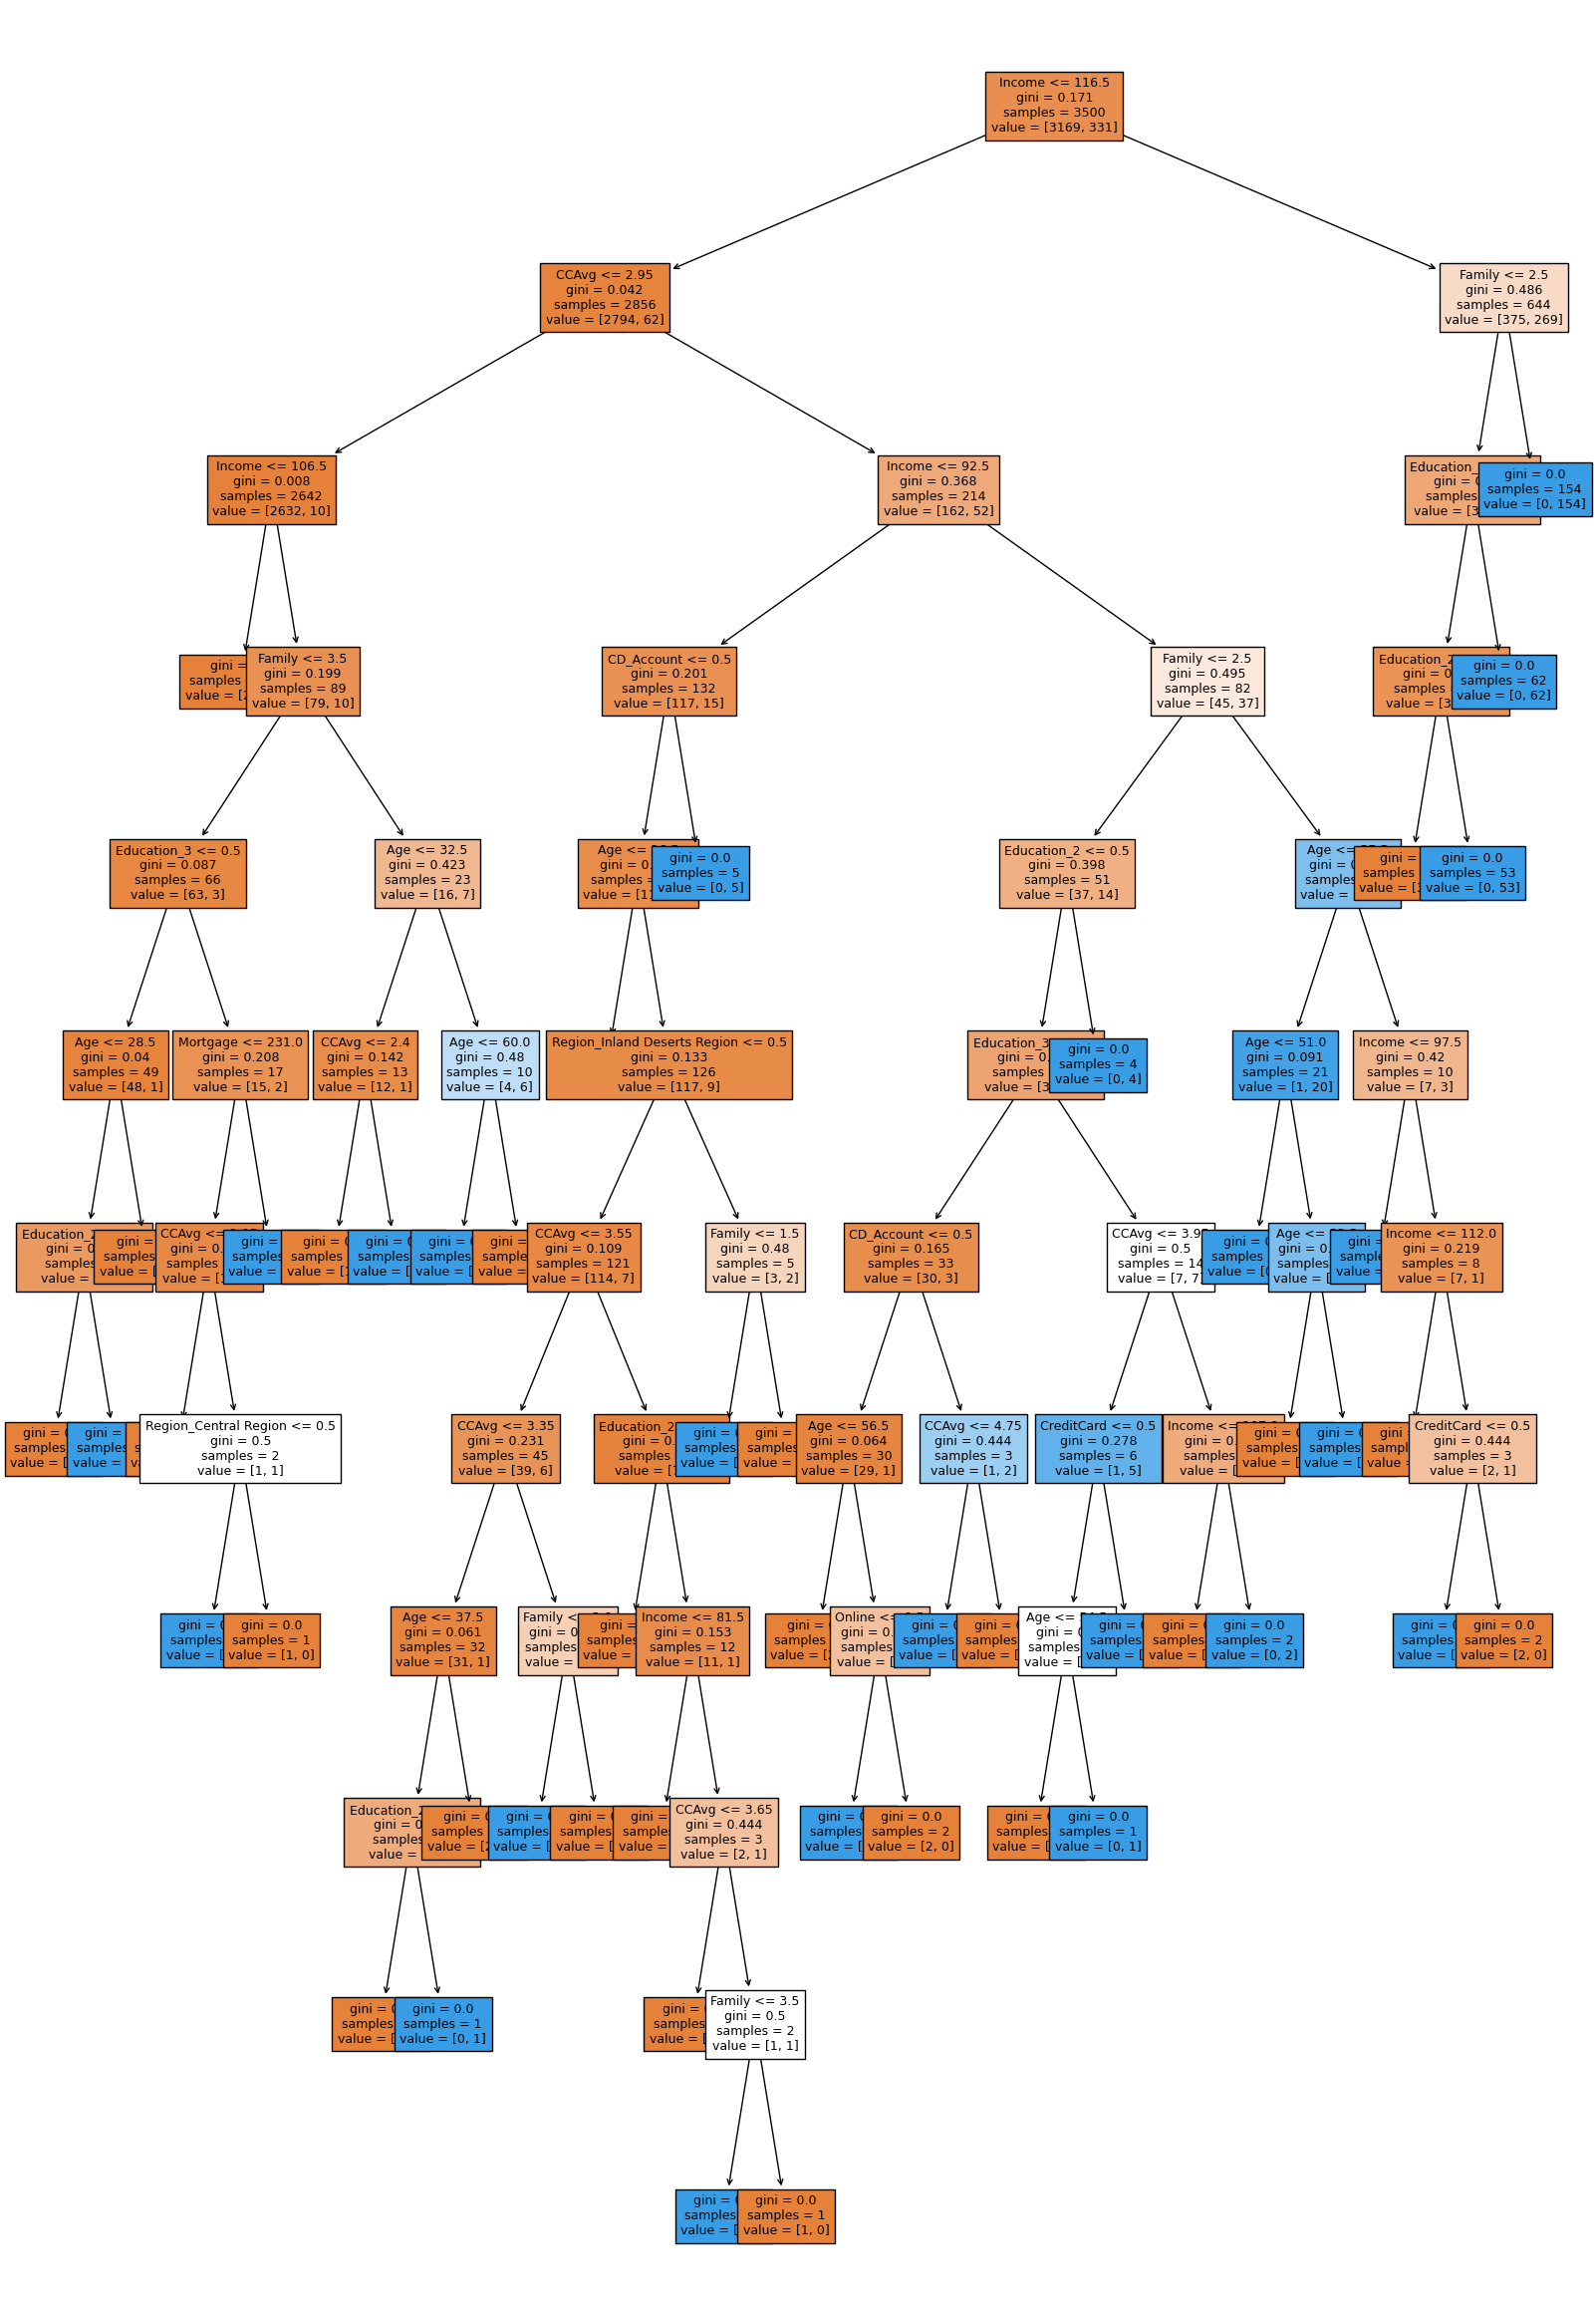

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [114]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Region_Central Region <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Region_C

<IPython.core.display.Javascript object>

In [115]:
# importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_Train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.308438
Family                        0.262801
Education_2                   0.168086
Education_3                   0.144605
CCAvg                         0.054223
Age                           0.032708
CD_Account                    0.017273
CreditCard                    0.003337
Mortgage                      0.002760
Online                        0.002224
Region_Inland Deserts Region  0.001876
Region_Central Region         0.001668
Securities_Account            0.000000
Region_North Central Region   0.000000
Region_Northern Region        0.000000
Region_South Coast Region     0.000000
Region_Unknown                0.000000


<IPython.core.display.Javascript object>

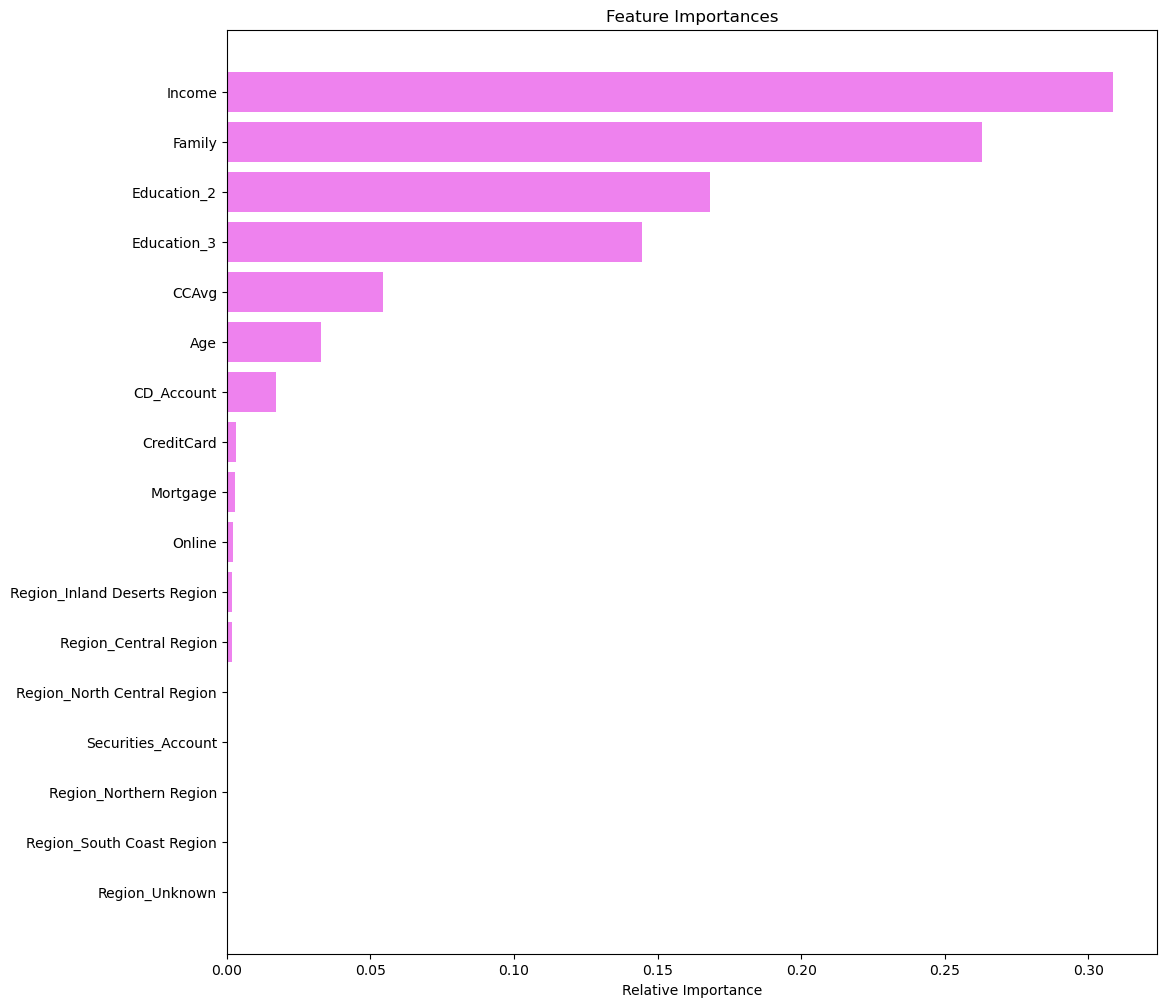

<IPython.core.display.Javascript object>

In [116]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [117]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_Train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_Train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

<IPython.core.display.Javascript object>

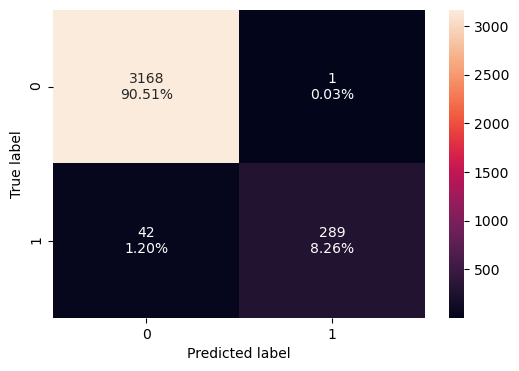

<IPython.core.display.Javascript object>

In [118]:
confusion_matrix_sklearn_with_threshold(estimator, X_Train, y_train)

In [119]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_Train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.8731117824773413


<IPython.core.display.Javascript object>

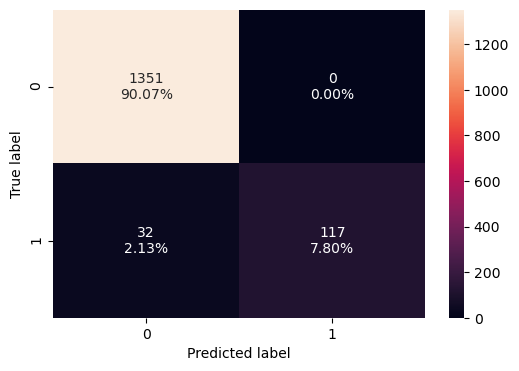

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn_with_threshold(estimator, X_Test, y_test)

In [121]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_Test, y_test)
decision_tree_tune_perf_test

0.785234899328859

<IPython.core.display.Javascript object>

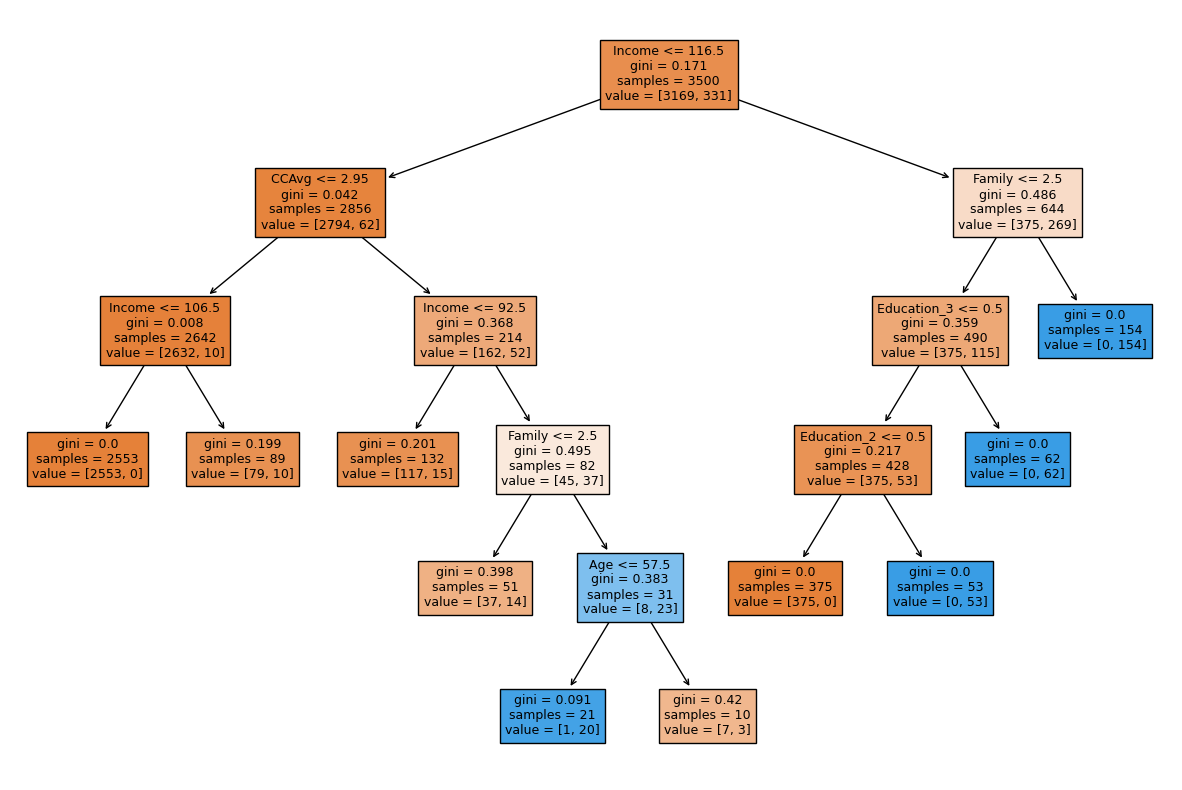

<IPython.core.display.Javascript object>

In [122]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [123]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

<IPython.core.display.Javascript object>

In [124]:
# importance of features in the tree building
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_Train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                   Imp
Income                        0.337681
Family                        0.275581
Education_2                   0.175687
Education_3                   0.157286
CCAvg                         0.042856
Age                           0.010908
CD_Account                    0.000000
Online                        0.000000
Securities_Account            0.000000
Region_Central Region         0.000000
Region_Inland Deserts Region  0.000000
Region_North Central Region   0.000000
Region_Northern Region        0.000000
Region_South Coast Region     0.000000
Region_Unknown                0.000000
Mortgage                      0.000000
CreditCard                    0.000000


<IPython.core.display.Javascript object>

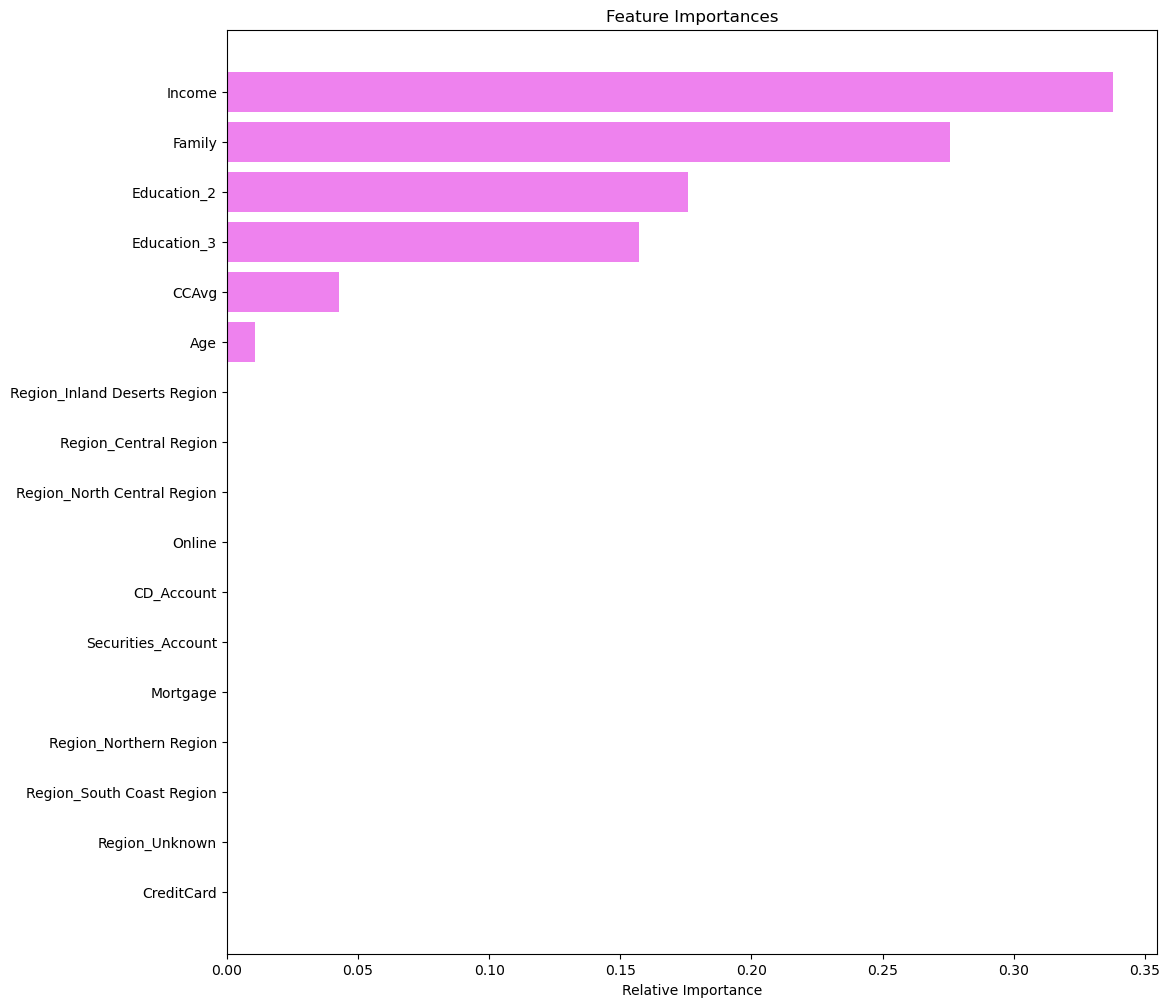

<IPython.core.display.Javascript object>

In [125]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Cost Complexity Pruning

In [126]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_Train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [127]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000141    0.000564
2     0.000238    0.001040
3     0.000250    0.001540
4     0.000268    0.002076
5     0.000272    0.002620
6     0.000275    0.003721
7     0.000276    0.004273
8     0.000277    0.004827
9     0.000381    0.005208
10    0.000527    0.005735
11    0.000625    0.006360
12    0.000686    0.007046
13    0.000692    0.010507
14    0.000700    0.011207
15    0.000762    0.012731
16    0.000882    0.016260
17    0.000940    0.017200
18    0.001305    0.018505
19    0.001647    0.020153
20    0.002333    0.022486
21    0.002407    0.024893
22    0.003294    0.028187
23    0.006473    0.034659
24    0.025146    0.084951
25    0.039216    0.124167
26    0.047088    0.171255

<IPython.core.display.Javascript object>

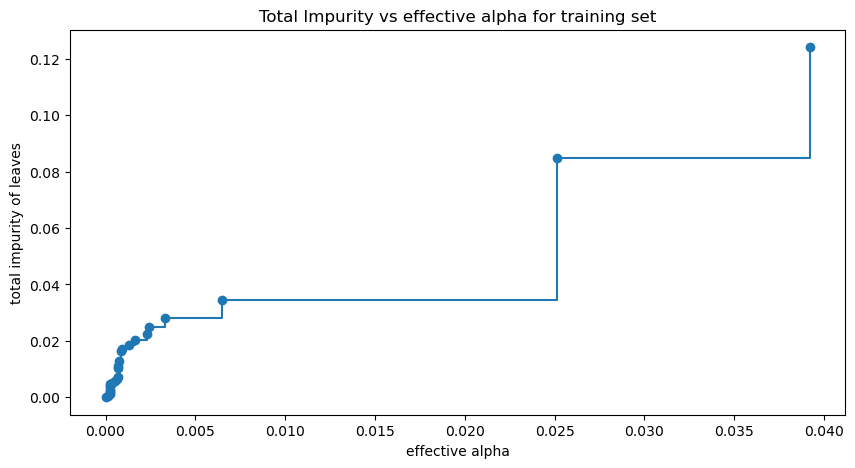

<IPython.core.display.Javascript object>

In [128]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [129]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_Train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


<IPython.core.display.Javascript object>

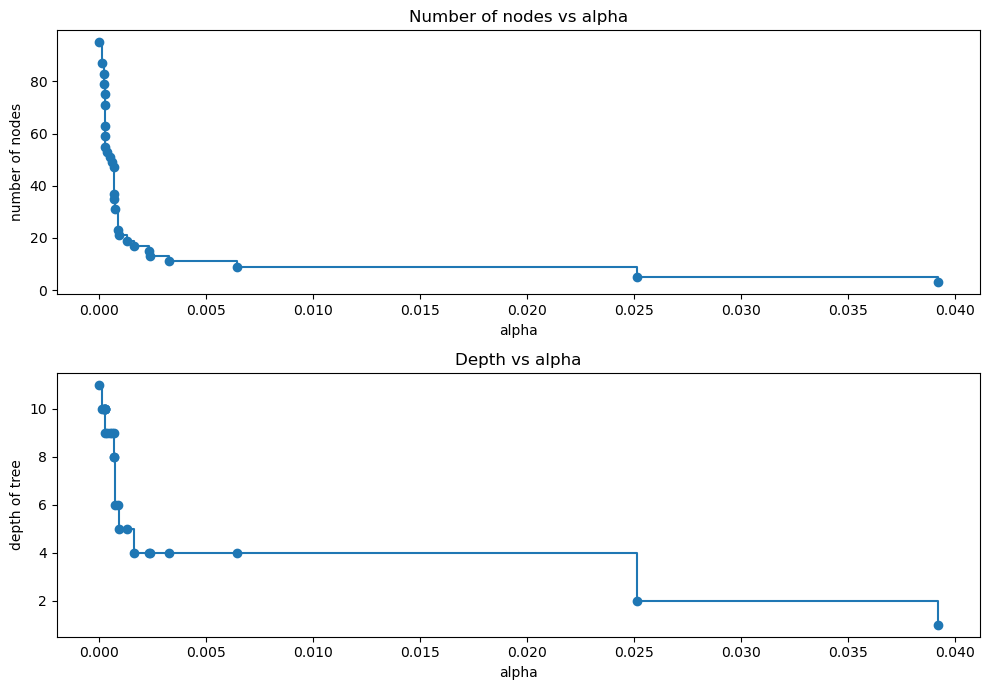

<IPython.core.display.Javascript object>

In [130]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [131]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_Train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [132]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_Test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [133]:
train_scores = [clf.score(X_Train, y_train) for clf in clfs]
test_scores = [clf.score(X_Test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

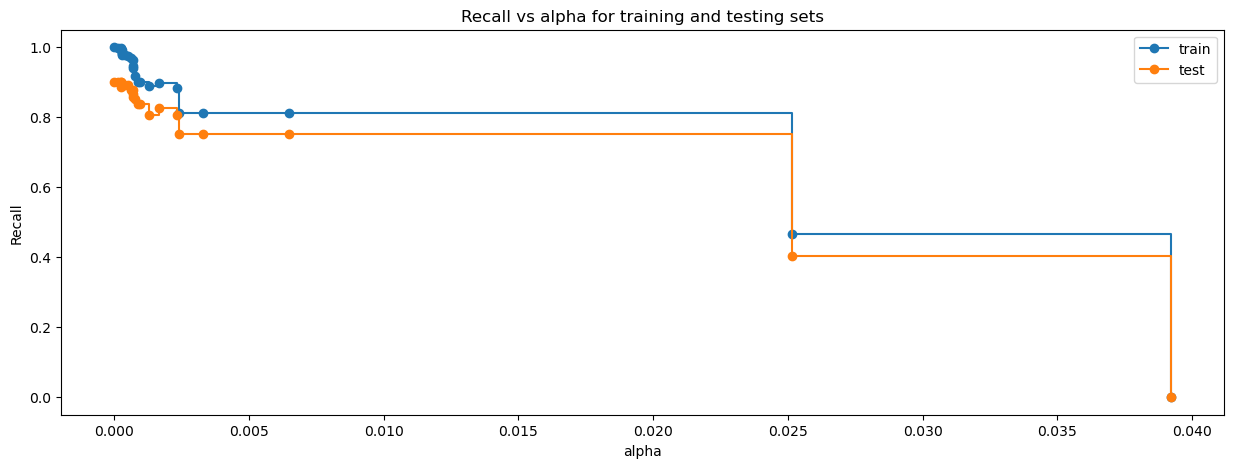

<IPython.core.display.Javascript object>

In [134]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [135]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

In [136]:
best_model.fit(X_Train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

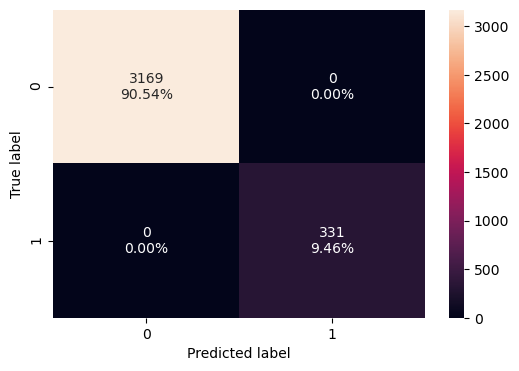

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn_with_threshold(best_model, X_Train, y_train)

In [138]:
print("Recall Score:", get_recall_score(best_model, X_Train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

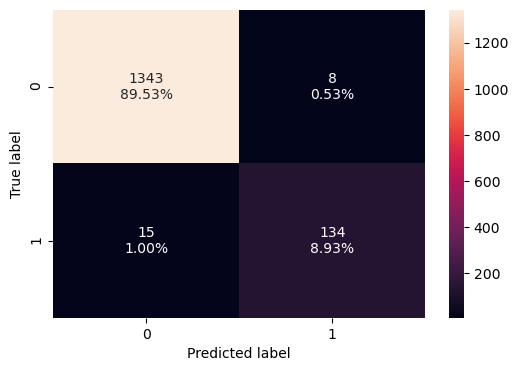

<IPython.core.display.Javascript object>

In [139]:
# Checking performance on test set
confusion_matrix_sklearn_with_threshold(best_model, X_Test, y_test)


In [140]:
print("Recall Score:", get_recall_score(best_model, X_Test, y_test))

Recall Score: 0.8993288590604027


<IPython.core.display.Javascript object>

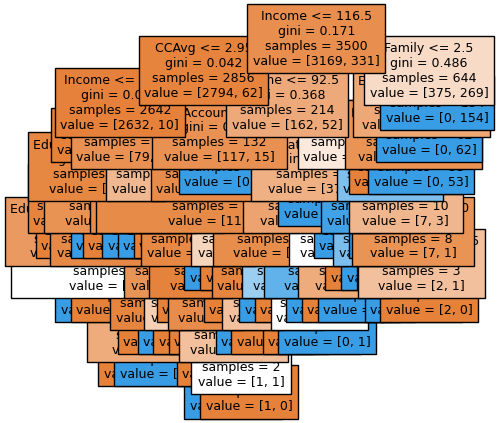

<IPython.core.display.Javascript object>

In [141]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [142]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002, random_state=1)
best_model2.fit(X_Train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, random_state=1)

<IPython.core.display.Javascript object>

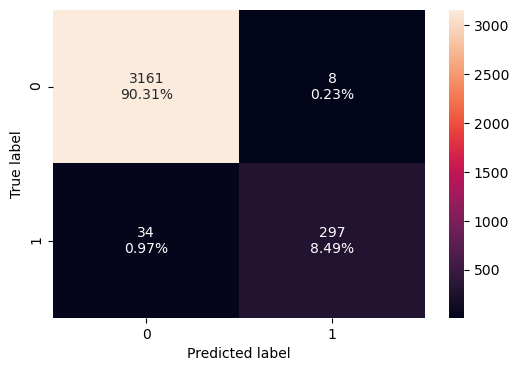

<IPython.core.display.Javascript object>

In [143]:
confusion_matrix_sklearn_with_threshold(best_model2, X_Train, y_train)

In [144]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_Train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.8972809667673716


<IPython.core.display.Javascript object>

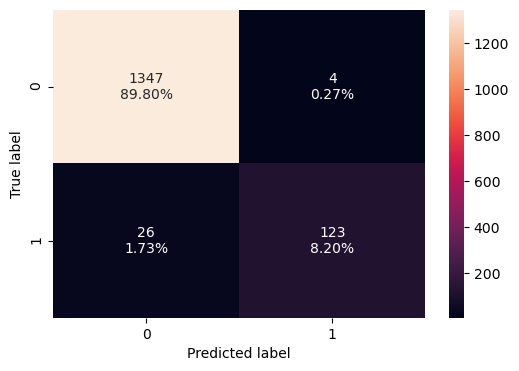

<IPython.core.display.Javascript object>

In [145]:
confusion_matrix_sklearn_with_threshold(best_model2, X_Test, y_test)

In [146]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_Test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.825503355704698


<IPython.core.display.Javascript object>

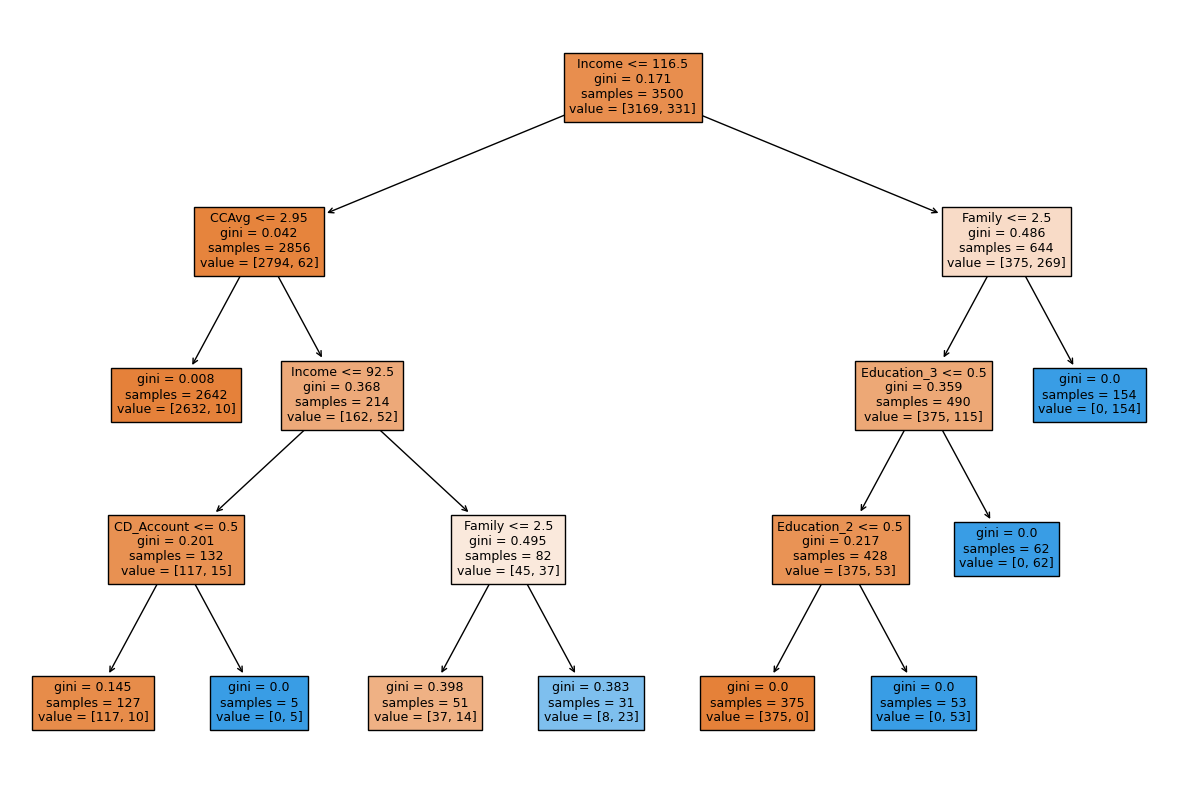

<IPython.core.display.Javascript object>

In [147]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [148]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- weights: [8.00, 23.00] class: 1
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [0.00, 154.00] class: 1



<IPython.core.display.Javascript object>

In [149]:
# importance of features in the tree building
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_Train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.333430
Family                        0.275463
Education_2                   0.175612
Education_3                   0.157219
CCAvg                         0.042837
CD_Account                    0.015440
Region_North Central Region   0.000000
Region_Unknown                0.000000
Region_South Coast Region     0.000000
Region_Northern Region        0.000000
Age                           0.000000
Region_Inland Deserts Region  0.000000
Region_Central Region         0.000000
Online                        0.000000
Securities_Account            0.000000
Mortgage                      0.000000
CreditCard                    0.000000


<IPython.core.display.Javascript object>

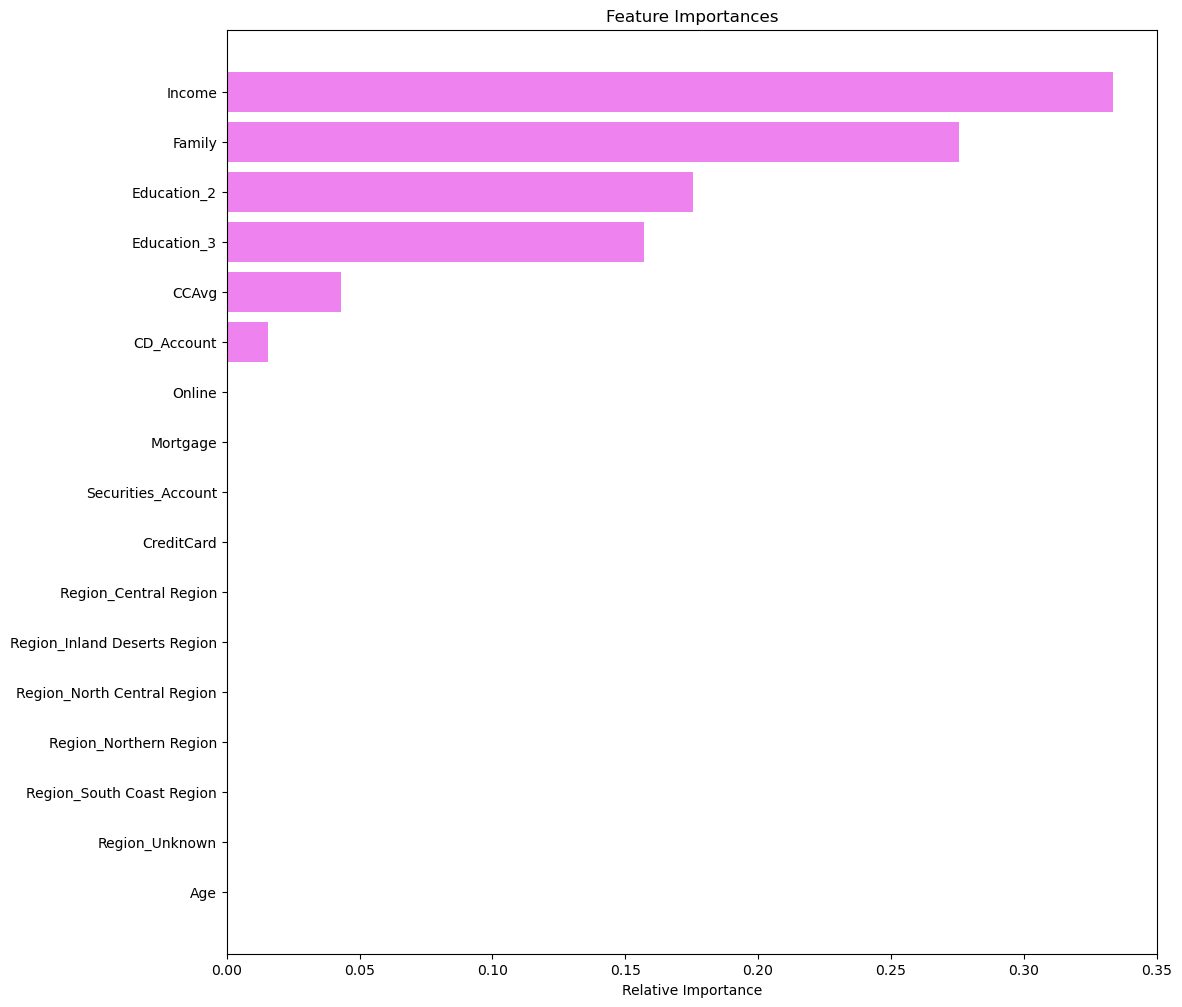

<IPython.core.display.Javascript object>

In [150]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Comparing all Decision Tree models

In [151]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.873112
2                0.897281

<IPython.core.display.Javascript object>

In [152]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.899329
1               0.785235
2               0.825503

<IPython.core.display.Javascript object>

Observation

- Decision Tree with post-pruning has given best recall score on train set

- Post-pruned decision tree gives generalized performance on train and test data

### Conclusion

- From the post-pruned decision tree, important features are Income (High importance), Education, CCAvg, Family and CD_Account(Less important among 5 important features)

- Decision Tree is giving best recall score when compared with Logistic Regression

### Recommendations

- Customers with high income are potential customers who can take personal loans

- Customers with Income > 90K can be potential customers for accepting personal loan

- Income and Family are negatively correlated and there are more chances for customers who have more family members to take personal loans

- Customers with high education qualification are most likely can take personal loans